# Setup

/tmp/ipython-input-2682904180.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


(8061, 37)
(8061,)
(123, 37)
(123,)
{'alpha': 0.0001, 'eta0': 0.1}
R^2: 0.963
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
R^2: 0.932
{'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}
R^2: 0.970


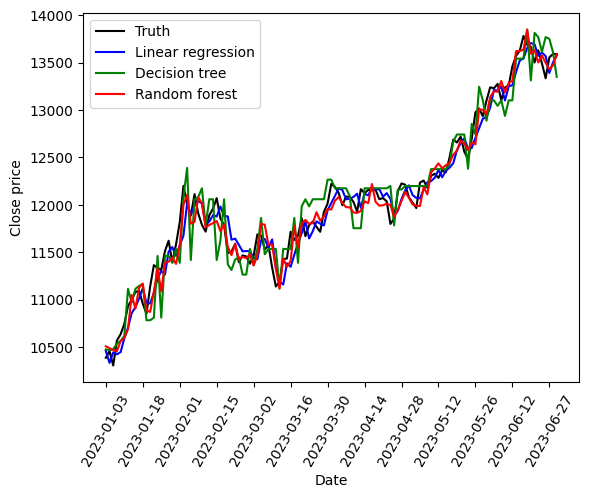

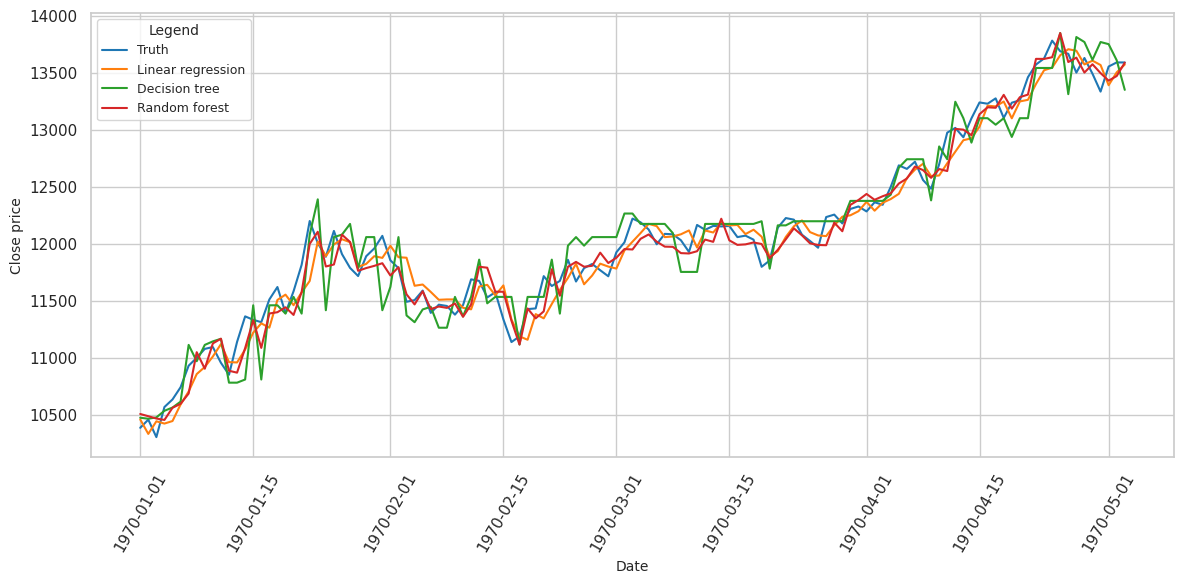

In [ ]:
import yfinance as yf


print("Downloading NASDAQ Composite data (1990-2023)...")
data = yf.download(
        "^IXIC",
        start="1990-01-01",
        end="2023-06-30",
        progress=False
    )



data.to_csv('19900101_20230630.csv')
def add_original_feature(df, df_new):
  df_new['open'] = df['Open']
  df_new['open_1'] = df['Open'].shift(1)
  df_new['close_1'] = df['Close'].shift(1)
  df_new['high_1'] = df['High'].shift(1)
  df_new['low_1'] = df['Low'].shift(1)
  df_new['volume_1'] = df['Volume'].shift(1)


def add_avg_price(df,df_new):
  df_new['avg_price_5'] = df['Close'].rolling(window=5).mean().shift(1)
  df_new['avg_price_30'] = df['Close'].rolling(window=21).mean().shift(1)
  df_new['avg_price_365'] = df['Close'].rolling(window=252).mean().shift(1)
  df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
  df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
  df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']


def add_avg_volume(df,df_new):
  df_new['avg_volume_5'] = df['Volume'].rolling(window=5).mean().shift(1)
  df_new['avg_volume_30'] = df['Volume'].rolling(window=21).mean().shift(1)
  df_new['avg_volume_365'] = df['Volume'].rolling(window=252).mean().shift(1)
  df_new['ratio_avg_volume_5_30'] = df_new['avg_volume_5'] / df_new['avg_volume_30']
  df_new['ratio_avg_volume_5_365'] = df_new['avg_volume_5'] / df_new['avg_volume_365']
  df_new['ratio_avg_volume_30_365'] = df_new['avg_volume_30'] / df_new['avg_volume_365']


def add_std_price(df,df_new):
  df_new['std_price_5'] = df['Close'].rolling(window=5).mean().shift(1)
  df_new['std_price_30'] = df['Close'].rolling(window=21).mean().shift(1)
  df_new['std_price_365'] = df['Close'].rolling(window=252).mean().shift(1)
  df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
  df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
  df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']

def add_std_volume(df,df_new):
  df_new['std_volume_5'] = df['Close'].rolling(window=5).mean().shift(1)
  df_new['std_volume_30'] = df['Close'].rolling(window=21).mean().shift(1)
  df_new['std_volume_365'] = df['Close'].rolling(window=252).mean().shift(1)
  df_new['ratio_std_volume_5_30'] = df_new['std_volume_5'] / df_new['std_volume_30']
  df_new['ratio_std_volume_5_365'] = df_new['std_volume_5'] / df_new['std_volume_365']
  df_new['ratio_std_volume_30_365'] = df_new['std_volume_30'] / df_new['std_volume_365']


def add_return_feature(df,df_new):
  df_new['return_1'] = ((df['Close']-df['Close'].shift(1))/df['Close'].shift(1)).shift(1)
  df_new['return_5'] = ((df['Close']- df['Close'].shift(5))/df['Close'].shift(5)).shift(1)
  df_new['return_30'] = ((df['Close']- df['Close'].shift(21))/df['Close'].shift(21)).shift(1)
  df_new['return_365'] = ((df['Close']- df['Close'].shift(252))/df['Close'].shift(252)).shift(1)
  df_new['movie_avg_5'] = df_new['return_1'].rolling(window=5).mean().shift(1)
  df_new['movie_avg_30'] = df_new['return_1'].rolling(window=21).mean().shift(1)
  df_new['movie_avg_365'] = df_new['return_1'].rolling(window=252).mean().shift(1)



def generate_features(df):
  """
  Generate features for a stock/index based on historical price and
  performance
  @param df: dataframe with columns "Open", "Close", "High", "Low","Volume", "Adj Close"
  @return: dataframe, data set with new features
 """
  df_new = pd.DataFrame()
  #6 original features
  add_original_feature(df, df_new)
  #31 generated features
  add_avg_price(df, df_new)
  add_avg_volume(df, df_new)
  add_std_price(df, df_new)
  add_std_volume(df, df_new)
  add_return_feature(df, df_new)
  #the target
  df_new['close'] = df['Close']
  df_new = df_new.dropna()
  return df_new



"""# Predicting stock prices with the three regression algorithms

1. Earlier, we generated features based on data from 1990 to the first half of 2023, and we will
now continue to construct the training set with data from 1990 to 2022 and the testing set with
data from the first half of 2023:
"""

import pandas as pd

data_raw = pd.read_csv('19900101_20230630.csv', header=None, index_col=0, skiprows=2)


# Assign column names to the data columns after setting the index
data_raw.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# The first row after skipping headers is the actual first data entry, no need for iloc[1:]

# Set the index name for clarity
data_raw.index.name = 'Date'

# Generate features using the cleaned data
data = generate_features(data_raw)
start_train = '1990-01-01'
end_train = '2022-12-31'
start_test = '2023-01-01'
end_test = '2023-06-30'
data_train = data.loc[start_train:end_train]
X_train = data_train.drop('close', axis=1).values
y_train = data_train['close'].values
print(X_train.shape)
print(y_train.shape)

"""All fields in the dataframe data except 'close' are feature columns, and 'close' is the target
column. We have 8,061 training samples and each sample is 37-dimensional. We also have
124 testing samples:
"""

data_train = data.loc[start_train:end_train]
data_test = data.loc[start_test:end_test] # Added to get test data
X_test = data_test.drop('close', axis=1).values # Added to get test features
y_test = data_test['close'].values # Added to get test targets
print(X_test.shape) # Changed to print X_test shape
print(y_test.shape) # Added to print y_test shape

"""2. We will first experiment with SGD-based linear regression. Before we train the model, you
should realize that SGD-based algorithms are sensitive to data with features at very different
scales; for example, in our case, the average value of the open feature is around 3,777, while
that of the moving_avg_365 feature is 0.00052 or so. Hence, we need to normalize features
into the same or a comparable scale. We do so by removing the mean and rescaling to unit
variance with StandardScaler:
"""

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

"""3. We rescale both sets with scaler, taught by the training set:"""

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

"""4. Now, we can search for the SGD-based linear regression with the optimal set of parameters.
We specify l2 regularization and 5000 maximal iterations and we tune the regularization term
multiplier, alpha, and initial learning rate, eta0:
"""

from sklearn.linear_model import SGDRegressor


param_grid = {
  "alpha": [1e-4, 3e-4, 1e-3],
  "eta0": [0.01, 0.03, 0.1],
}
lr = SGDRegressor(penalty='l2', max_iter=5000, random_state=42)

"""5. For cross-validation, we need to ensure that the training data in each split comes before the
corresponding test data, preserving the temporal order of the time series. Here, we use the
TimeSeriesSplit method from scikit-learn:
"""

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=3)
grid_search = GridSearchCV(lr, param_grid, cv=tscv, scoring='r2')
grid_search.fit(X_scaled_train, y_train)

"""6. Select the best linear regression model and make predictions of the testing samples:"""

print(grid_search.best_params_)
lr_best = grid_search.best_estimator_
predictions_lr = lr_best.predict(X_scaled_test)

"""7. Measure the prediction performance via $R^2$ :"""

from sklearn.metrics import r2_score

print(f'R^2: {r2_score(y_test, predictions_lr):.3f}')

"""8. Similarly, let’s experiment with a decision tree. We tune the maximum depth of the tree, max_
depth; the minimum number of samples required to further split a node, min_samples_split;
and the minimum number of samples required to form a leaf node, min_samples_leaf, as
follows:
"""

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV


param_grid = {
  'max_depth': [20, 30, 50],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 3, 5]
}
dt = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt, param_grid,
                           cv=tscv,
                           scoring='r2',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

"""9. Select the best regression forest model and make predictions of the testing samples:"""

print(grid_search.best_params_)
dt_best = grid_search.best_estimator_
predictions_dt = dt_best.predict(X_test)

"""10. Measure the prediction performance as follows:"""

print(f'R^2: {r2_score(y_test, predictions_dt):.3f}')

"""11. Finally, we experiment with a random forest. We specify 30 decision trees to ensemble and
tune the same set of hyperparameters used in each tree, as follows:
"""

from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'max_depth': [20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
  }

rf = RandomForestRegressor(n_estimators=30,
                           n_jobs=-1,
                           random_state=42)

grid_search = GridSearchCV(rf,
                           param_grid,
                           cv=tscv,
                           scoring='r2',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

"""12. Select the best regression forest model and make predictions of the testing samples:"""

print(grid_search.best_params_)

rf_best = grid_search.best_estimator_

predictions_rf = rf_best.predict(X_test)

"""13. Measure the prediction performance as follows:"""

print(f'R^2: {r2_score(y_test, predictions_rf):.3f}')

"""14. We also plot the prediction generated by each of the three algorithms, along with the ground
truth:
"""

import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.plot(data_test.index, y_test, c='k')
plt.plot(data_test.index, predictions_lr, c='b')
plt.plot(data_test.index, predictions_dt, c='g')
plt.plot(data_test.index, predictions_rf, c='r')
plt.xticks(range(0, 130, 10), rotation=60)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close price', fontsize=10)
plt.legend(['Truth', 'Linear regression', 'Decision tree', 'Random forest'], fontsize=10)
plt.show()

"""another graph from me using seaborn"""

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Prepare the data for Seaborn in "long" format
df_plot = pd.DataFrame({
    'Date': data_test.index,
    'Truth': y_test,
    'Linear regression': predictions_lr,
    'Decision tree': predictions_dt,
    'Random forest': predictions_rf
})

# Convert to long format for seaborn
df_long = df_plot.melt(id_vars='Date',
                       value_vars=['Truth', 'Linear regression', 'Decision tree', 'Random forest'],
                       var_name='Model',
                       value_name='Close price')

# Set style
sns.set_theme(style="whitegrid")

# Create the lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Date', y='Close price', hue='Model', palette='tab10')

# Customize ticks and labels
plt.xticks(rotation=60)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close price', fontsize=10)
plt.legend(title='Legend', fontsize=9, title_fontsize=10)

# Format x-axis as 'YYYY-MM-DD'
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator()) # Changed AutoLocator to AutoDateLocator


plt.tight_layout()
plt.show()

# Exercice

## Exerice : 1. As mentioned, can you add more signals to our stock prediction system, such as the perfor-mance of other major indexes? Does this improve prediction?

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [ ]:
# Download data for multiple indices
print("Downloading market data (1990-2023)...")

# Define the indices to download
indices = {
    '^IXIC': 'NASDAQ',     # NASDAQ Composite (our target)
    '^GSPC': 'SP500',      # S&P 500
    '^DJI': 'DOW',         # Dow Jones Industrial Average
    '^RUT': 'RUSSELL',     # Russell 2000 (small cap)
    '^VIX': 'VIX',         # Volatility Index
    '^TNX': 'TNX',         # 10-Year Treasury Note Yield
    'GLD': 'GOLD',         # Gold ETF as safe haven indicator
    'DXY': 'DOLLAR'        # US Dollar Index
}

# Download all data
all_data = {}
for symbol, name in indices.items():
    try:
        data = yf.download(
            symbol,
            start="1990-01-01",
            end="2023-06-30",
            progress=False
        )
        if not data.empty:
            all_data[name] = data
            print(f"Successfully downloaded {name} ({symbol})")
        else:
            print(f"No data available for {name} ({symbol})")
    except Exception as e:
        print(f"Error downloading {name} ({symbol}): {e}")

# Save NASDAQ data (our target) as before
nasdaq_data = all_data['NASDAQ']
nasdaq_data.to_csv('19900101_20230630.csv')

/tmp/ipython-input-1531177278.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Successfully downloaded NASDAQ (^IXIC)


/tmp/ipython-input-1531177278.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Successfully downloaded SP500 (^GSPC)


/tmp/ipython-input-1531177278.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Successfully downloaded DOW (^DJI)


/tmp/ipython-input-1531177278.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Successfully downloaded RUSSELL (^RUT)


/tmp/ipython-input-1531177278.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Successfully downloaded VIX (^VIX)


/tmp/ipython-input-1531177278.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Successfully downloaded TNX (^TNX)


/tmp/ipython-input-1531177278.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Successfully downloaded GOLD (GLD)


/tmp/ipython-input-1531177278.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Successfully downloaded DOLLAR (DXY)


In [ ]:
def add_original_feature(df, df_new, prefix=''):
    """Add original OHLCV features with optional prefix"""
    df_new[f'{prefix}open'] = df['Open']
    df_new[f'{prefix}open_1'] = df['Open'].shift(1)
    df_new[f'{prefix}close_1'] = df['Close'].shift(1)
    df_new[f'{prefix}high_1'] = df['High'].shift(1)
    df_new[f'{prefix}low_1'] = df['Low'].shift(1)
    if 'Volume' in df.columns:
        df_new[f'{prefix}volume_1'] = df['Volume'].shift(1)

def add_avg_price(df, df_new, prefix=''):
    """Add moving average price features with optional prefix"""
    df_new[f'{prefix}avg_price_5'] = df['Close'].rolling(window=5).mean().shift(1)
    df_new[f'{prefix}avg_price_30'] = df['Close'].rolling(window=21).mean().shift(1)
    df_new[f'{prefix}avg_price_365'] = df['Close'].rolling(window=252).mean().shift(1)
    df_new[f'{prefix}ratio_avg_price_5_30'] = df_new[f'{prefix}avg_price_5'] / df_new[f'{prefix}avg_price_30']
    df_new[f'{prefix}ratio_avg_price_5_365'] = df_new[f'{prefix}avg_price_5'] / df_new[f'{prefix}avg_price_365']
    df_new[f'{prefix}ratio_avg_price_30_365'] = df_new[f'{prefix}avg_price_30'] / df_new[f'{prefix}avg_price_365']

def add_avg_volume(df, df_new, prefix=''):
    """Add moving average volume features with optional prefix"""
    if 'Volume' in df.columns:
        df_new[f'{prefix}avg_volume_5'] = df['Volume'].rolling(window=5).mean().shift(1)
        df_new[f'{prefix}avg_volume_30'] = df['Volume'].rolling(window=21).mean().shift(1)
        df_new[f'{prefix}avg_volume_365'] = df['Volume'].rolling(window=252).mean().shift(1)
        df_new[f'{prefix}ratio_avg_volume_5_30'] = df_new[f'{prefix}avg_volume_5'] / df_new[f'{prefix}avg_volume_30']
        df_new[f'{prefix}ratio_avg_volume_5_365'] = df_new[f'{prefix}avg_volume_5'] / df_new[f'{prefix}avg_volume_365']
        df_new[f'{prefix}ratio_avg_volume_30_365'] = df_new[f'{prefix}avg_volume_30'] / df_new[f'{prefix}avg_volume_365']

def add_std_price(df, df_new, prefix=''):
    """Add price volatility features (fixed from original code)"""
    df_new[f'{prefix}std_price_5'] = df['Close'].rolling(window=5).std().shift(1)
    df_new[f'{prefix}std_price_30'] = df['Close'].rolling(window=21).std().shift(1)
    df_new[f'{prefix}std_price_365'] = df['Close'].rolling(window=252).std().shift(1)
    # Avoid division by zero
    df_new[f'{prefix}ratio_std_price_5_30'] = df_new[f'{prefix}std_price_5'] / (df_new[f'{prefix}std_price_30'] + 1e-8)
    df_new[f'{prefix}ratio_std_price_5_365'] = df_new[f'{prefix}std_price_5'] / (df_new[f'{prefix}std_price_365'] + 1e-8)
    df_new[f'{prefix}ratio_std_price_30_365'] = df_new[f'{prefix}std_price_30'] / (df_new[f'{prefix}std_price_365'] + 1e-8)

def add_std_volume(df, df_new, prefix=''):
    """Add volume volatility features (fixed from original code)"""
    if 'Volume' in df.columns:
        df_new[f'{prefix}std_volume_5'] = df['Volume'].rolling(window=5).std().shift(1)
        df_new[f'{prefix}std_volume_30'] = df['Volume'].rolling(window=21).std().shift(1)
        df_new[f'{prefix}std_volume_365'] = df['Volume'].rolling(window=252).std().shift(1)
        # Avoid division by zero
        df_new[f'{prefix}ratio_std_volume_5_30'] = df_new[f'{prefix}std_volume_5'] / (df_new[f'{prefix}std_volume_30'] + 1e-8)
        df_new[f'{prefix}ratio_std_volume_5_365'] = df_new[f'{prefix}std_volume_5'] / (df_new[f'{prefix}std_volume_365'] + 1e-8)
        df_new[f'{prefix}ratio_std_volume_30_365'] = df_new[f'{prefix}std_volume_30'] / (df_new[f'{prefix}std_volume_365'] + 1e-8)

def add_return_feature(df, df_new, prefix=''):
    """Add return-based features with optional prefix"""
    df_new[f'{prefix}return_1'] = ((df['Close']-df['Close'].shift(1))/df['Close'].shift(1)).shift(1)
    df_new[f'{prefix}return_5'] = ((df['Close']- df['Close'].shift(5))/df['Close'].shift(5)).shift(1)
    df_new[f'{prefix}return_30'] = ((df['Close']- df['Close'].shift(21))/df['Close'].shift(21)).shift(1)
    df_new[f'{prefix}return_365'] = ((df['Close']- df['Close'].shift(252))/df['Close'].shift(252)).shift(1)
    df_new[f'{prefix}moving_avg_5'] = df_new[f'{prefix}return_1'].rolling(window=5).mean().shift(1)
    df_new[f'{prefix}moving_avg_30'] = df_new[f'{prefix}return_1'].rolling(window=21).mean().shift(1)
    df_new[f'{prefix}moving_avg_365'] = df_new[f'{prefix}return_1'].rolling(window=252).mean().shift(1)

def add_correlation_features(nasdaq_df, other_dfs, df_new):
    """Add correlation-based features between NASDAQ and other indices"""
    nasdaq_returns = nasdaq_df['Close'].pct_change()

    for name, other_df in other_dfs.items():
        if other_df is not None and not other_df.empty and 'Close' in other_df.columns:
            try:
                other_returns = other_df['Close'].pct_change()

                # Rolling correlations - ensure we get Series, not DataFrame
                corr_5 = nasdaq_returns.rolling(window=5).corr(other_returns).shift(1)
                corr_30 = nasdaq_returns.rolling(window=21).corr(other_returns).shift(1)
                corr_90 = nasdaq_returns.rolling(window=63).corr(other_returns).shift(1)

                # Make sure we're assigning Series, not DataFrame
                if isinstance(corr_5, pd.Series):
                    df_new[f'corr_{name.lower()}_5'] = corr_5
                if isinstance(corr_30, pd.Series):
                    df_new[f'corr_{name.lower()}_30'] = corr_30
                if isinstance(corr_90, pd.Series):
                    df_new[f'corr_{name.lower()}_90'] = corr_90

                # Relative strength
                nasdaq_ma = nasdaq_df['Close'].rolling(window=21).mean()
                other_ma = other_df['Close'].rolling(window=21).mean()
                nasdaq_rs = nasdaq_df['Close'] / nasdaq_ma
                other_rs = other_df['Close'] / other_ma
                rel_strength = (nasdaq_rs / other_rs).shift(1)

                # Make sure we're assigning Series, not DataFrame
                if isinstance(rel_strength, pd.Series):
                    df_new[f'rel_strength_{name.lower()}'] = rel_strength

            except Exception as e:
                print(f"Warning: Could not generate correlation features for {name}: {e}")
                continue

def generate_enhanced_features(target_df, other_indices_data):
    """
    Generate enhanced features including signals from other market indices
    """
    print(f"Generating features for target with shape: {target_df.shape}")
    df_new = pd.DataFrame()

    # Original NASDAQ features (our target)
    print("Adding original NASDAQ features...")
    add_original_feature(target_df, df_new)
    add_avg_price(target_df, df_new)
    add_avg_volume(target_df, df_new)
    add_std_price(target_df, df_new)
    add_std_volume(target_df, df_new)
    add_return_feature(target_df, df_new)

    print(f"After original features: {df_new.shape}")

    # Add features from other indices
    for name, other_df in other_indices_data.items():
        if other_df is not None and not other_df.empty and name != 'NASDAQ':
            print(f"Adding features from {name}...")
            try:
                prefix = f"{name.lower()}_"
                # Add subset of features for other indices (focusing on returns and key metrics)
                add_return_feature(other_df, df_new, prefix)
                add_avg_price(other_df, df_new, prefix)
                add_std_price(other_df, df_new, prefix)

                # Add the current close price as a feature
                if 'Close' in other_df.columns:
                    close_shifted = other_df['Close'].shift(1)
                    if isinstance(close_shifted, pd.Series):
                        df_new[f'{prefix}close_current'] = close_shifted

                print(f"After {name} features: {df_new.shape}")
            except Exception as e:
                print(f"Warning: Could not add features from {name}: {e}")
                continue

    # Add correlation and relative strength features
    print("Adding correlation features...")
    try:
        other_indices = {k: v for k, v in other_indices_data.items() if k != 'NASDAQ'}
        add_correlation_features(target_df, other_indices, df_new)
        print(f"After correlation features: {df_new.shape}")
    except Exception as e:
        print(f"Warning: Could not add correlation features: {e}")

    # The target (NASDAQ close price)
    df_new['close'] = target_df['Close']
    print(f"Before dropna: {df_new.shape}")
    df_new = df_new.dropna()
    print(f"After dropna: {df_new.shape}")

    return df_new


In [ ]:
# Load and prepare NASDAQ data
# First, let's examine the CSV structure
print("Examining CSV structure...")
with open('19900101_20230630.csv', 'r') as f:
    for i, line in enumerate(f):
        if i < 5:  # Show first 5 lines
            print(f"Line {i}: {line.strip()}")

# Load the data with proper handling
try:
    # Try loading with header=0 first (most common case)
    data_raw = pd.read_csv('19900101_20230630.csv', index_col=0)
    print(f"Loaded with header=0. Shape: {data_raw.shape}")
    print(f"Columns: {list(data_raw.columns)}")
    print(f"Index name: {data_raw.index.name}")

    # If the columns don't match expected OHLCV format, try different approach
    if len(data_raw.columns) != 5 or 'Close' not in data_raw.columns:
        print("Standard format not detected, trying alternative loading...")
        data_raw = pd.read_csv('19900101_20230630.csv', header=None, index_col=0, skiprows=1)
        data_raw.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
        # Keep only the columns we need and reorder to match expected format
        data_raw = data_raw[['Close', 'High', 'Low', 'Open', 'Volume']]

except Exception as e:
    print(f"Error loading with header=0: {e}")
    print("Trying with skiprows=2...")
    data_raw = pd.read_csv('19900101_20230630.csv', header=None, index_col=0, skiprows=2)
    data_raw.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

data_raw.index.name = 'Date'

Examining CSV structure...
Line 0: Price,Close,High,Low,Open,Volume
Line 1: Ticker,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC
Line 2: Date,,,,,
Line 3: 1990-01-02,459.29998779296875,459.29998779296875,452.70001220703125,452.8999938964844,110720000
Line 4: 1990-01-03,460.8999938964844,461.6000061035156,460.0,461.1000061035156,152660000
Loaded with header=0. Shape: (8440, 5)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']
Index name: Price


In [ ]:
# Convert index to datetime with error handling
try:
    data_raw.index = pd.to_datetime(data_raw.index)
    print(f"Successfully converted index to datetime. Date range: {data_raw.index.min()} to {data_raw.index.max()}")
except Exception as e:
    print(f"Error converting index to datetime: {e}")
    print(f"First few index values: {data_raw.index[:5].tolist()}")
    # Try to clean the index first
    data_raw.index = data_raw.index.str.strip()  # Remove whitespace
    data_raw = data_raw[data_raw.index != 'Date']  # Remove any 'Date' header rows
    data_raw.index = pd.to_datetime(data_raw.index, errors='coerce')
    data_raw = data_raw.dropna()  # Remove rows with invalid dates
    print(f"After cleaning - Shape: {data_raw.shape}, Date range: {data_raw.index.min()} to {data_raw.index.max()}")

print(f"Final data shape: {data_raw.shape}")
print(f"Data types:\n{data_raw.dtypes}")
print(f"First few rows:\n{data_raw.head()}")


# Convert all columns to numeric, handling any non-numeric values
print("Converting data to numeric types...")
for col in data_raw.columns:
    data_raw[col] = pd.to_numeric(data_raw[col], errors='coerce')

Error converting index to datetime: Unknown datetime string format, unable to parse: Ticker, at position 0
First few index values: ['Ticker', 'Date', '1990-01-02', '1990-01-03', '1990-01-04']
After cleaning - Shape: (8439, 5), Date range: 1990-01-02 00:00:00 to 2023-06-29 00:00:00
Final data shape: (8439, 5)
Data types:
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object
First few rows:
                         Close                High                 Low  \
Date                                                                     
NaT                      ^IXIC               ^IXIC               ^IXIC   
1990-01-02  459.29998779296875  459.29998779296875  452.70001220703125   
1990-01-03   460.8999938964844   461.6000061035156               460.0   
1990-01-04   459.3999938964844  460.79998779296875   456.8999938964844   
1990-01-05  458.20001220703125   459.3999938964844  457.79998779296875   

                         Open     Volume  
D

/tmp/ipython-input-2437595054.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_raw.index = pd.to_datetime(data_raw.index)
/tmp/ipython-input-2437595054.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_raw.index = pd.to_datetime(data_raw.index, errors='coerce')


In [ ]:
# Remove any rows with NaN values that resulted from conversion
rows_before = len(data_raw)
data_raw = data_raw.dropna()
rows_after = len(data_raw)
if rows_before != rows_after:
    print(f"Removed {rows_before - rows_after} rows with non-numeric data")

print(f"After numeric conversion - Shape: {data_raw.shape}")
print(f"Data types:\n{data_raw.dtypes}")
print(f"Sample data:\n{data_raw.head()}")

# Ensure we have the minimum required data
if len(data_raw) < 500:
    print("ERROR: Not enough data rows. Please check the CSV file format.")
    print("Expected format: Date,Open,High,Low,Close,Adj Close,Volume")
else:
    print(f"Data validation passed. Ready to generate features with {len(data_raw)} rows.")

Removed 1 rows with non-numeric data
After numeric conversion - Shape: (8438, 5)
Data types:
Close     float64
High      float64
Low       float64
Open      float64
Volume    float64
dtype: object
Sample data:
                 Close        High         Low        Open       Volume
Date                                                                   
1990-01-02  459.299988  459.299988  452.700012  452.899994  110720000.0
1990-01-03  460.899994  461.600006  460.000000  461.100006  152660000.0
1990-01-04  459.399994  460.799988  456.899994  460.399994  147950000.0
1990-01-05  458.200012  459.399994  457.799988  457.899994  137230000.0
1990-01-08  458.700012  458.700012  456.500000  457.100006  115500000.0
Data validation passed. Ready to generate features with 8438 rows.


In [ ]:
# Align all other indices data with NASDAQ dates
aligned_data = {'NASDAQ': data_raw}
print(f"\nAligning other market indices with NASDAQ data...")
print(f"NASDAQ date range: {data_raw.index.min()} to {data_raw.index.max()}")

for name, df in all_data.items():
    if name != 'NASDAQ' and df is not None and not df.empty:
        try:
            # Ensure both indices are datetime
            if not isinstance(df.index, pd.DatetimeIndex):
                df.index = pd.to_datetime(df.index)

            # Convert all columns to numeric
            for col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')
            df = df.dropna()

            # Reindex to match NASDAQ dates using forward fill
            df_aligned = df.reindex(data_raw.index, method='ffill')
            aligned_data[name] = df_aligned
            print(f"✓ Aligned {name} data: {df_aligned.shape} - Date range: {df.index.min()} to {df.index.max()}")
        except Exception as e:
            print(f"✗ Failed to align {name}: {e}")
    elif name != 'NASDAQ':
        print(f"✗ Skipping {name}: No data available")



Aligning other market indices with NASDAQ data...
NASDAQ date range: 1990-01-02 00:00:00 to 2023-06-29 00:00:00
✓ Aligned SP500 data: (8438, 5) - Date range: 1990-01-02 00:00:00 to 2023-06-29 00:00:00
✓ Aligned DOW data: (8438, 5) - Date range: 1992-01-02 00:00:00 to 2023-06-29 00:00:00
✓ Aligned RUSSELL data: (8438, 5) - Date range: 1990-01-02 00:00:00 to 2023-06-29 00:00:00
✓ Aligned VIX data: (8438, 5) - Date range: 1990-01-02 00:00:00 to 2023-06-29 00:00:00
✓ Aligned TNX data: (8438, 5) - Date range: 1990-01-02 00:00:00 to 2023-06-29 00:00:00
✓ Aligned GOLD data: (8438, 5) - Date range: 2004-11-18 00:00:00 to 2023-06-29 00:00:00
✓ Aligned DOLLAR data: (8438, 5) - Date range: 2006-01-03 00:00:00 to 2020-04-29 00:00:00


In [ ]:
# Generate original features (for comparison)
def generate_features_original(df):
    """Original feature generation function for comparison"""
    df_new = pd.DataFrame()
    add_original_feature(df, df_new)
    add_avg_price(df, df_new)
    add_avg_volume(df, df_new)
    add_std_price(df, df_new)
    add_std_volume(df, df_new)
    add_return_feature(df, df_new)
    df_new['close'] = df['Close']
    df_new = df_new.dropna()
    return df_new

print("Generating original features...")
data_original = generate_features_original(data_raw)

# Generate enhanced features with other indices
print("Generating enhanced features with other market indices...")
data_enhanced = generate_enhanced_features(data_raw, aligned_data)



print(f"Original features shape: {data_original.shape}")
print(f"Enhanced features shape: {data_enhanced.shape}")
print(f"Added {data_enhanced.shape[1] - data_original.shape[1]} new features from other indices")


Generating original features...
Generating enhanced features with other market indices...
Generating features for target with shape: (8438, 5)
Adding original NASDAQ features...
After original features: (8438, 37)
Adding features from SP500...
After SP500 features: (8438, 56)
Adding features from DOW...
After DOW features: (8438, 75)
Adding features from RUSSELL...
After RUSSELL features: (8438, 94)
Adding features from VIX...
After VIX features: (8438, 113)
Adding features from TNX...
After TNX features: (8438, 132)
Adding features from GOLD...
After GOLD features: (8438, 151)
Adding features from DOLLAR...
After DOLLAR features: (8438, 170)
Adding correlation features...


/tmp/ipython-input-2383438429.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f'{prefix}moving_avg_365'] = df_new[f'{prefix}return_1'].rolling(window=252).mean().shift(1)
/tmp/ipython-input-2383438429.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f'{prefix}avg_price_5'] = df['Close'].rolling(window=5).mean().shift(1)
/tmp/ipython-input-2383438429.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

After correlation features: (8438, 170)
Before dropna: (8438, 171)
After dropna: (4148, 171)
Original features shape: (8184, 38)
Enhanced features shape: (4148, 171)
Added 133 new features from other indices


/tmp/ipython-input-2383438429.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['close'] = target_df['Close']


In [ ]:
# Split data
start_train = '1990-01-01'
end_train = '2022-12-31'
start_test = '2023-01-01'
end_test = '2023-06-30'

def prepare_data(data, start_train, end_train, start_test, end_test):
    """Prepare training and testing data"""
    data_train = data.loc[start_train:end_train]
    data_test = data.loc[start_test:end_test]

    X_train = data_train.drop('close', axis=1).values
    y_train = data_train['close'].values
    X_test = data_test.drop('close', axis=1).values
    y_test = data_test['close'].values

    return X_train, y_train, X_test, y_test, data_test

In [ ]:
# Prepare both datasets
X_train_orig, y_train_orig, X_test_orig, y_test_orig, data_test_orig = prepare_data(
    data_original, start_train, end_train, start_test, end_test)

X_train_enh, y_train_enh, X_test_enh, y_test_enh, data_test_enh = prepare_data(
    data_enhanced, start_train, end_train, start_test, end_test)

print(f"Original training data shape: {X_train_orig.shape}")
print(f"Enhanced training data shape: {X_train_enh.shape}")

Original training data shape: (8061, 37)
Enhanced training data shape: (4025, 170)


In [ ]:
# Function to train and evaluate models
def train_evaluate_models(X_train, y_train, X_test, y_test, data_test, model_suffix=""):
    """Train and evaluate all three models"""
    results = {}

    # Scale features
    scaler = StandardScaler()
    X_scaled_train = scaler.fit_transform(X_train)
    X_scaled_test = scaler.transform(X_test)

    # Time series cross-validation
    tscv = TimeSeriesSplit(n_splits=3)

    # 1. SGD Linear Regression
    print(f"Training Linear Regression{model_suffix}...")
    param_grid_lr = {
        "alpha": [1e-4, 3e-4, 1e-3],
        "eta0": [0.01, 0.03, 0.1],
    }
    lr = SGDRegressor(penalty='l2', max_iter=5000, random_state=42)
    grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=tscv, scoring='r2')
    grid_search_lr.fit(X_scaled_train, y_train)

    lr_best = grid_search_lr.best_estimator_
    predictions_lr = lr_best.predict(X_scaled_test)
    r2_lr = r2_score(y_test, predictions_lr)

    results['Linear Regression'] = {
        'model': lr_best,
        'predictions': predictions_lr,
        'r2': r2_lr,
        'best_params': grid_search_lr.best_params_
    }

    # 2. Decision Tree
    print(f"Training Decision Tree{model_suffix}...")
    param_grid_dt = {
        'max_depth': [20, 30, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 3, 5]
    }
    dt = DecisionTreeRegressor(random_state=42)
    grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=tscv, scoring='r2', n_jobs=-1)
    grid_search_dt.fit(X_train, y_train)

    dt_best = grid_search_dt.best_estimator_
    predictions_dt = dt_best.predict(X_test)
    r2_dt = r2_score(y_test, predictions_dt)

    results['Decision Tree'] = {
        'model': dt_best,
        'predictions': predictions_dt,
        'r2': r2_dt,
        'best_params': grid_search_dt.best_params_
    }
        # 3. Random Forest
    print(f"Training Random Forest{model_suffix}...")
    param_grid_rf = {
        'max_depth': [20, 30, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 3, 5]
    }
    rf = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=42)
    grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=tscv, scoring='r2', n_jobs=-1)
    grid_search_rf.fit(X_train, y_train)

    rf_best = grid_search_rf.best_estimator_
    predictions_rf = rf_best.predict(X_test)
    r2_rf = r2_score(y_test, predictions_rf)

    results['Random Forest'] = {
        'model': rf_best,
        'predictions': predictions_rf,
        'r2': r2_rf,
        'best_params': grid_search_rf.best_params_
    }

    return results


In [ ]:
# Train models on both datasets
print("="*50)
print("TRAINING MODELS WITH ORIGINAL FEATURES")
print("="*50)
results_original = train_evaluate_models(
    X_train_orig, y_train_orig, X_test_orig, y_test_orig, data_test_orig, " (Original)")

print("="*50)
print("TRAINING MODELS WITH ENHANCED FEATURES")
print("="*50)
results_enhanced = train_evaluate_models(
    X_train_enh, y_train_enh, X_test_enh, y_test_enh, data_test_enh, " (Enhanced)")

# Compare results
print("="*50)
print("PERFORMANCE COMPARISON")
print("="*50)

comparison_data = []
for model_name in ['Linear Regression', 'Decision Tree', 'Random Forest']:
    r2_orig = results_original[model_name]['r2']
    r2_enh = results_enhanced[model_name]['r2']
    improvement = r2_enh - r2_orig

    comparison_data.append({
        'Model': model_name,
        'Original R²': f"{r2_orig:.4f}",
        'Enhanced R²': f"{r2_enh:.4f}",
        'Improvement': f"{improvement:+.4f}",
        'Relative Improvement': f"{(improvement/abs(r2_orig)*100):+.2f}%" if r2_orig != 0 else "N/A"
    })

    print(f"{model_name}:")
    print(f"  Original R²:  {r2_orig:.4f}")
    print(f"  Enhanced R²:  {r2_enh:.4f}")
    print(f"  Improvement:  {improvement:+.4f} ({(improvement/abs(r2_orig)*100):+.2f}%)")
    print()


TRAINING MODELS WITH ORIGINAL FEATURES
Training Linear Regression (Original)...
Training Decision Tree (Original)...
Training Random Forest (Original)...
TRAINING MODELS WITH ENHANCED FEATURES
Training Linear Regression (Enhanced)...
Training Decision Tree (Enhanced)...
Training Random Forest (Enhanced)...
PERFORMANCE COMPARISON
Linear Regression:
  Original R²:  0.9579
  Enhanced R²:  0.9332
  Improvement:  -0.0247 (-2.58%)

Decision Tree:
  Original R²:  -2.3211
  Enhanced R²:  0.8827
  Improvement:  +3.2038 (+138.03%)

Random Forest:
  Original R²:  0.9310
  Enhanced R²:  0.9682
  Improvement:  +0.0372 (+4.00%)



In [ ]:
# Create comparison DataFrame
comparison_df = pd.DataFrame(comparison_data)
print("Summary Table:")
print(comparison_df.to_string(index=False))

Summary Table:
            Model Original R² Enhanced R² Improvement Relative Improvement
Linear Regression      0.9579      0.9332     -0.0247               -2.58%
    Decision Tree     -2.3211      0.8827     +3.2038             +138.03%
    Random Forest      0.9310      0.9682     +0.0372               +4.00%


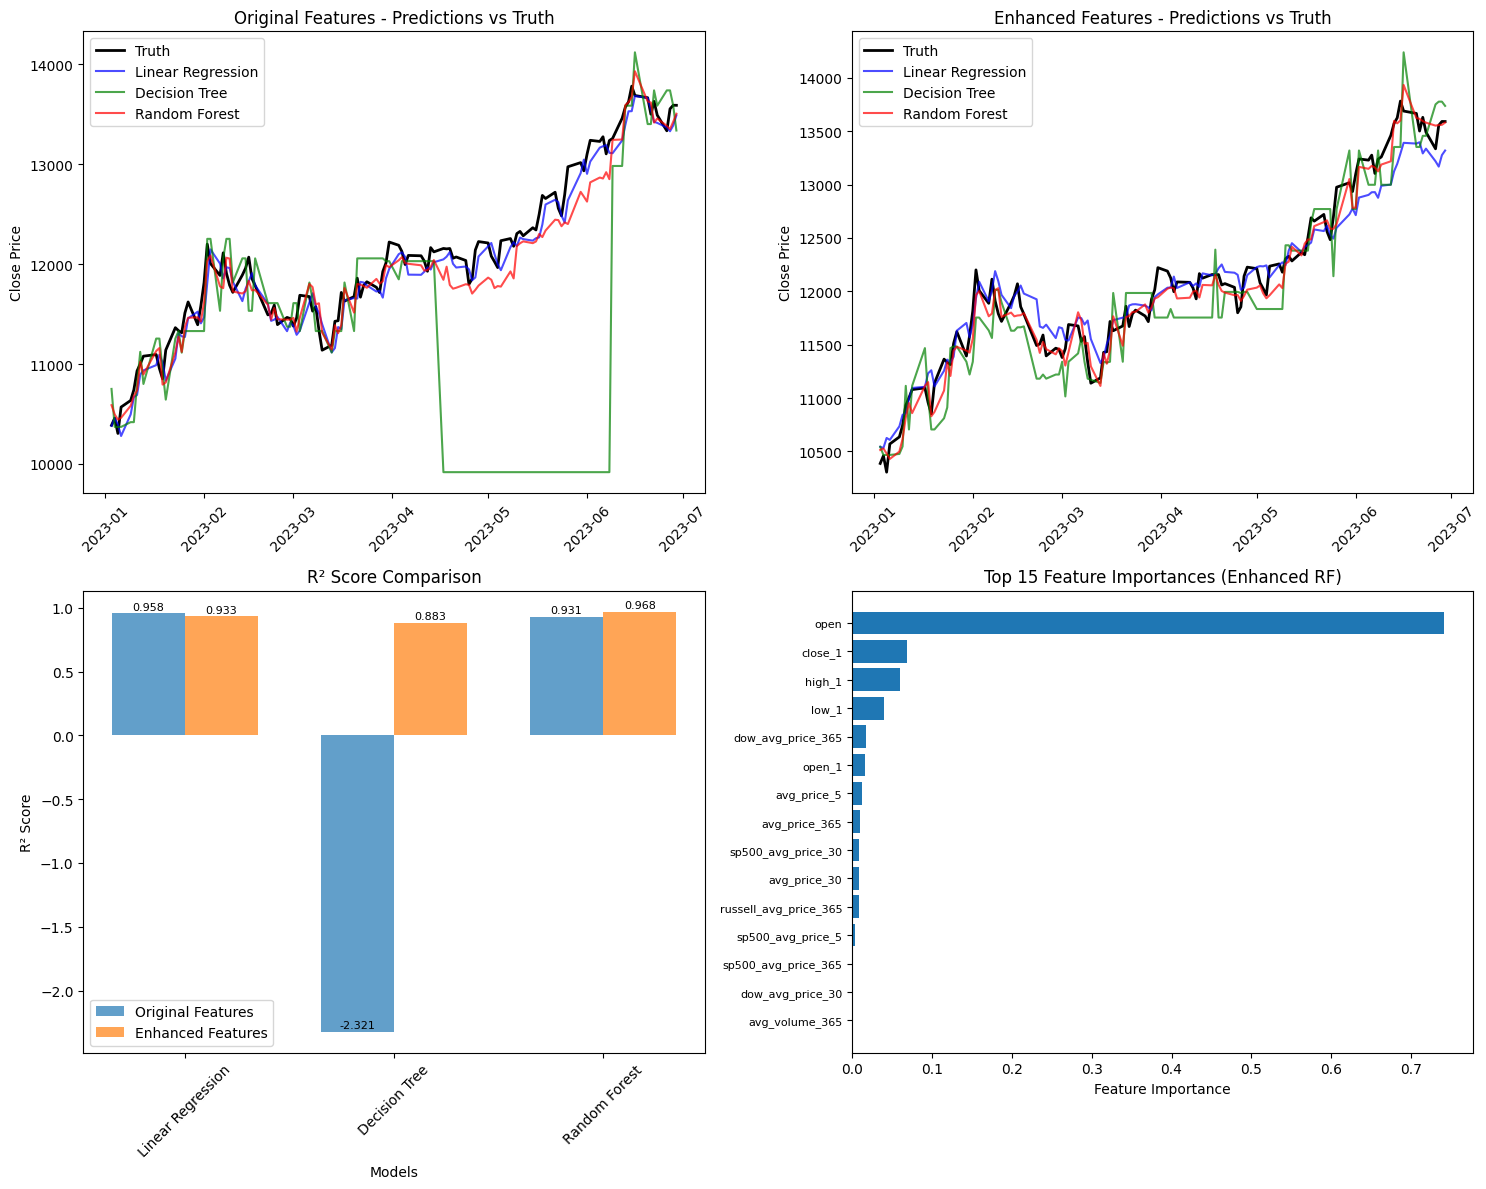

In [ ]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Original features predictions
ax1 = axes[0, 0]
ax1.plot(data_test_orig.index, y_test_orig, 'k-', linewidth=2, label='Truth')
ax1.plot(data_test_orig.index, results_original['Linear Regression']['predictions'], 'b-', alpha=0.7, label='Linear Regression')
ax1.plot(data_test_orig.index, results_original['Decision Tree']['predictions'], 'g-', alpha=0.7, label='Decision Tree')
ax1.plot(data_test_orig.index, results_original['Random Forest']['predictions'], 'r-', alpha=0.7, label='Random Forest')
ax1.set_title('Original Features - Predictions vs Truth')
ax1.set_ylabel('Close Price')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Enhanced features predictions
ax2 = axes[0, 1]
ax2.plot(data_test_enh.index, y_test_enh, 'k-', linewidth=2, label='Truth')
ax2.plot(data_test_enh.index, results_enhanced['Linear Regression']['predictions'], 'b-', alpha=0.7, label='Linear Regression')
ax2.plot(data_test_enh.index, results_enhanced['Decision Tree']['predictions'], 'g-', alpha=0.7, label='Decision Tree')
ax2.plot(data_test_enh.index, results_enhanced['Random Forest']['predictions'], 'r-', alpha=0.7, label='Random Forest')
ax2.set_title('Enhanced Features - Predictions vs Truth')
ax2.set_ylabel('Close Price')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

# Plot 3: R² Comparison
ax3 = axes[1, 0]
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_original = [results_original[m]['r2'] for m in models]
r2_enhanced = [results_enhanced[m]['r2'] for m in models]

x = np.arange(len(models))
width = 0.35

bars1 = ax3.bar(x - width/2, r2_original, width, label='Original Features', alpha=0.7)
bars2 = ax3.bar(x + width/2, r2_enhanced, width, label='Enhanced Features', alpha=0.7)

ax3.set_xlabel('Models')
ax3.set_ylabel('R² Score')
ax3.set_title('R² Score Comparison')
ax3.set_xticks(x)
ax3.set_xticklabels(models, rotation=45)
ax3.legend()

# Add value labels on bars
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax3.text(bar1.get_x() + bar1.get_width()/2., height1 + 0.01,
             f'{height1:.3f}', ha='center', va='bottom', fontsize=8)
    ax3.text(bar2.get_x() + bar2.get_width()/2., height2 + 0.01,
             f'{height2:.3f}', ha='center', va='bottom', fontsize=8)

# Plot 4: Feature importance for Random Forest (Enhanced)
ax4 = axes[1, 1]
if hasattr(results_enhanced['Random Forest']['model'], 'feature_importances_'):
    feature_names = data_enhanced.drop('close', axis=1).columns
    importances = results_enhanced['Random Forest']['model'].feature_importances_

    # Get top 15 most important features
    indices = np.argsort(importances)[::-1][:15]
    top_features = [feature_names[i] for i in indices]
    top_importances = [importances[i] for i in indices]

    y_pos = np.arange(len(top_features))
    ax4.barh(y_pos, top_importances)
    ax4.set_yticks(y_pos)
    ax4.set_yticklabels(top_features, fontsize=8)
    ax4.set_xlabel('Feature Importance')
    ax4.set_title('Top 15 Feature Importances (Enhanced RF)')
    ax4.invert_yaxis()

plt.tight_layout()
plt.show()



In [ ]:
# Print feature importance analysis
print("="*50)
print("FEATURE IMPORTANCE ANALYSIS (Random Forest with Enhanced Features)")
print("="*50)

if hasattr(results_enhanced['Random Forest']['model'], 'feature_importances_'):
    feature_names = data_enhanced.drop('close', axis=1).columns
    importances = results_enhanced['Random Forest']['model'].feature_importances_

    # Create feature importance DataFrame
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print("Top 20 Most Important Features:")
    print(feature_importance_df.head(20).to_string(index=False))

    # Analyze new vs original features
    new_features = feature_importance_df[
        feature_importance_df['Feature'].str.contains('sp500_|dow_|russell_|vix_|tnx_|gold_|dollar_|corr_|rel_strength_')
    ]

    if not new_features.empty:
        print(f"\nNew features from other indices in top 20: {len(new_features[new_features.index < 20])}")
        print("Top new features:")
        print(new_features.head(10).to_string(index=False))

        total_new_importance = new_features['Importance'].sum()
        print(f"\nTotal importance of new features: {total_new_importance:.4f} ({total_new_importance*100:.2f}%)")

FEATURE IMPORTANCE ANALYSIS (Random Forest with Enhanced Features)
Top 20 Most Important Features:
              Feature  Importance
                 open    0.740829
              close_1    0.069276
               high_1    0.060669
                low_1    0.040246
    dow_avg_price_365    0.017983
               open_1    0.016419
          avg_price_5    0.012417
        avg_price_365    0.010616
   sp500_avg_price_30    0.008701
         avg_price_30    0.008608
russell_avg_price_365    0.008325
    sp500_avg_price_5    0.003238
  sp500_avg_price_365    0.001436
     dow_avg_price_30    0.000655
       avg_volume_365    0.000060
 russell_avg_price_30    0.000036
  russell_avg_price_5    0.000021
    tnx_avg_price_365    0.000016
 dollar_avg_price_365    0.000014
    tnx_std_price_365    0.000012

New features from other indices in top 20: 0
Top new features:
              Feature  Importance
    dow_avg_price_365    0.017983
   sp500_avg_price_30    0.008701
russell_avg_price_365

Exercice 2

/tmp/ipython-input-2071945633.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Successfully downloaded NASDAQ (^IXIC)
Successfully downloaded SP500 (^GSPC)


/tmp/ipython-input-2071945633.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
/tmp/ipython-input-2071945633.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Successfully downloaded DOW (^DJI)
Successfully downloaded RUSSELL (^RUT)


/tmp/ipython-input-2071945633.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
/tmp/ipython-input-2071945633.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Successfully downloaded VIX (^VIX)


/tmp/ipython-input-2071945633.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Successfully downloaded TNX (^TNX)


/tmp/ipython-input-2071945633.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Successfully downloaded GOLD (GLD)
Successfully downloaded DOLLAR (DXY)


/tmp/ipython-input-2071945633.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Examining CSV structure...
Line 0: Price,Close,High,Low,Open,Volume
Line 1: Ticker,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC
Line 2: Date,,,,,
Line 3: 1990-01-02,459.29998779296875,459.29998779296875,452.70001220703125,452.8999938964844,110720000
Line 4: 1990-01-03,460.8999938964844,461.6000061035156,460.0,461.1000061035156,152660000
Loaded with header=0. Shape: (8440, 5)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']
Index name: Price
Error converting index to datetime: Unknown datetime string format, unable to parse: Ticker, at position 0
First few index values: ['Ticker', 'Date', '1990-01-02', '1990-01-03', '1990-01-04']
After cleaning - Shape: (8439, 5), Date range: 1990-01-02 00:00:00 to 2023-06-29 00:00:00
Final data shape: (8439, 5)
Data types:
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object
First few rows:
                         Close                High                 Low  \
Date                                                    

/tmp/ipython-input-2071945633.py:239: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_raw.index = pd.to_datetime(data_raw.index)
/tmp/ipython-input-2071945633.py:247: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_raw.index = pd.to_datetime(data_raw.index, errors='coerce')


Removed 1 rows with non-numeric data
After numeric conversion - Shape: (8438, 5)
Data types:
Close     float64
High      float64
Low       float64
Open      float64
Volume    float64
dtype: object
Sample data:
                 Close        High         Low        Open       Volume
Date                                                                   
1990-01-02  459.299988  459.299988  452.700012  452.899994  110720000.0
1990-01-03  460.899994  461.600006  460.000000  461.100006  152660000.0
1990-01-04  459.399994  460.799988  456.899994  460.399994  147950000.0
1990-01-05  458.200012  459.399994  457.799988  457.899994  137230000.0
1990-01-08  458.700012  458.700012  456.500000  457.100006  115500000.0
Data validation passed. Ready to generate features with 8438 rows.

Aligning other market indices with NASDAQ data...
NASDAQ date range: 1990-01-02 00:00:00 to 2023-06-29 00:00:00
✓ Aligned SP500 data: (8438, 5) - Date range: 1990-01-02 00:00:00 to 2023-06-29 00:00:00
✓ Aligned DOW dat

/tmp/ipython-input-2071945633.py:109: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f'{prefix}moving_avg_365'] = df_new[f'{prefix}return_1'].rolling(window=252).mean().shift(1)
/tmp/ipython-input-2071945633.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f'{prefix}avg_price_5'] = df['Close'].rolling(window=5).mean().shift(1)
/tmp/ipython-input-2071945633.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

After VIX features: (8438, 113)
Adding features from TNX...
After TNX features: (8438, 132)
Adding features from GOLD...
After GOLD features: (8438, 151)
Adding features from DOLLAR...
After DOLLAR features: (8438, 170)
Adding correlation features...
After correlation features: (8438, 170)
Before dropna: (8438, 171)
After dropna: (4148, 171)
Original features shape: (8184, 38)
Enhanced features shape: (4148, 171)
Added 133 new features from other indices
Original training data shape: (8061, 37)
Enhanced training data shape: (4025, 170)
TRAINING MODELS WITH ORIGINAL FEATURES
Training Linear Regression (Original)...


/tmp/ipython-input-2071945633.py:198: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['close'] = target_df['Close']


Training Decision Tree (Original)...
Training Random Forest (Original)...
TRAINING MODELS WITH ENHANCED FEATURES
Training Linear Regression (Enhanced)...
Training Decision Tree (Enhanced)...
Training Random Forest (Enhanced)...
PERFORMANCE COMPARISON
Linear Regression:
  Original R²:  0.9579
  Enhanced R²:  0.9332
  Improvement:  -0.0247 (-2.58%)

Decision Tree:
  Original R²:  -2.3211
  Enhanced R²:  0.8827
  Improvement:  +3.2038 (+138.03%)

Random Forest:
  Original R²:  0.9310
  Enhanced R²:  0.9682
  Improvement:  +0.0372 (+4.00%)

Summary Table:
            Model Original R² Enhanced R² Improvement Relative Improvement
Linear Regression      0.9579      0.9332     -0.0247               -2.58%
    Decision Tree     -2.3211      0.8827     +3.2038             +138.03%
    Random Forest      0.9310      0.9682     +0.0372               +4.00%


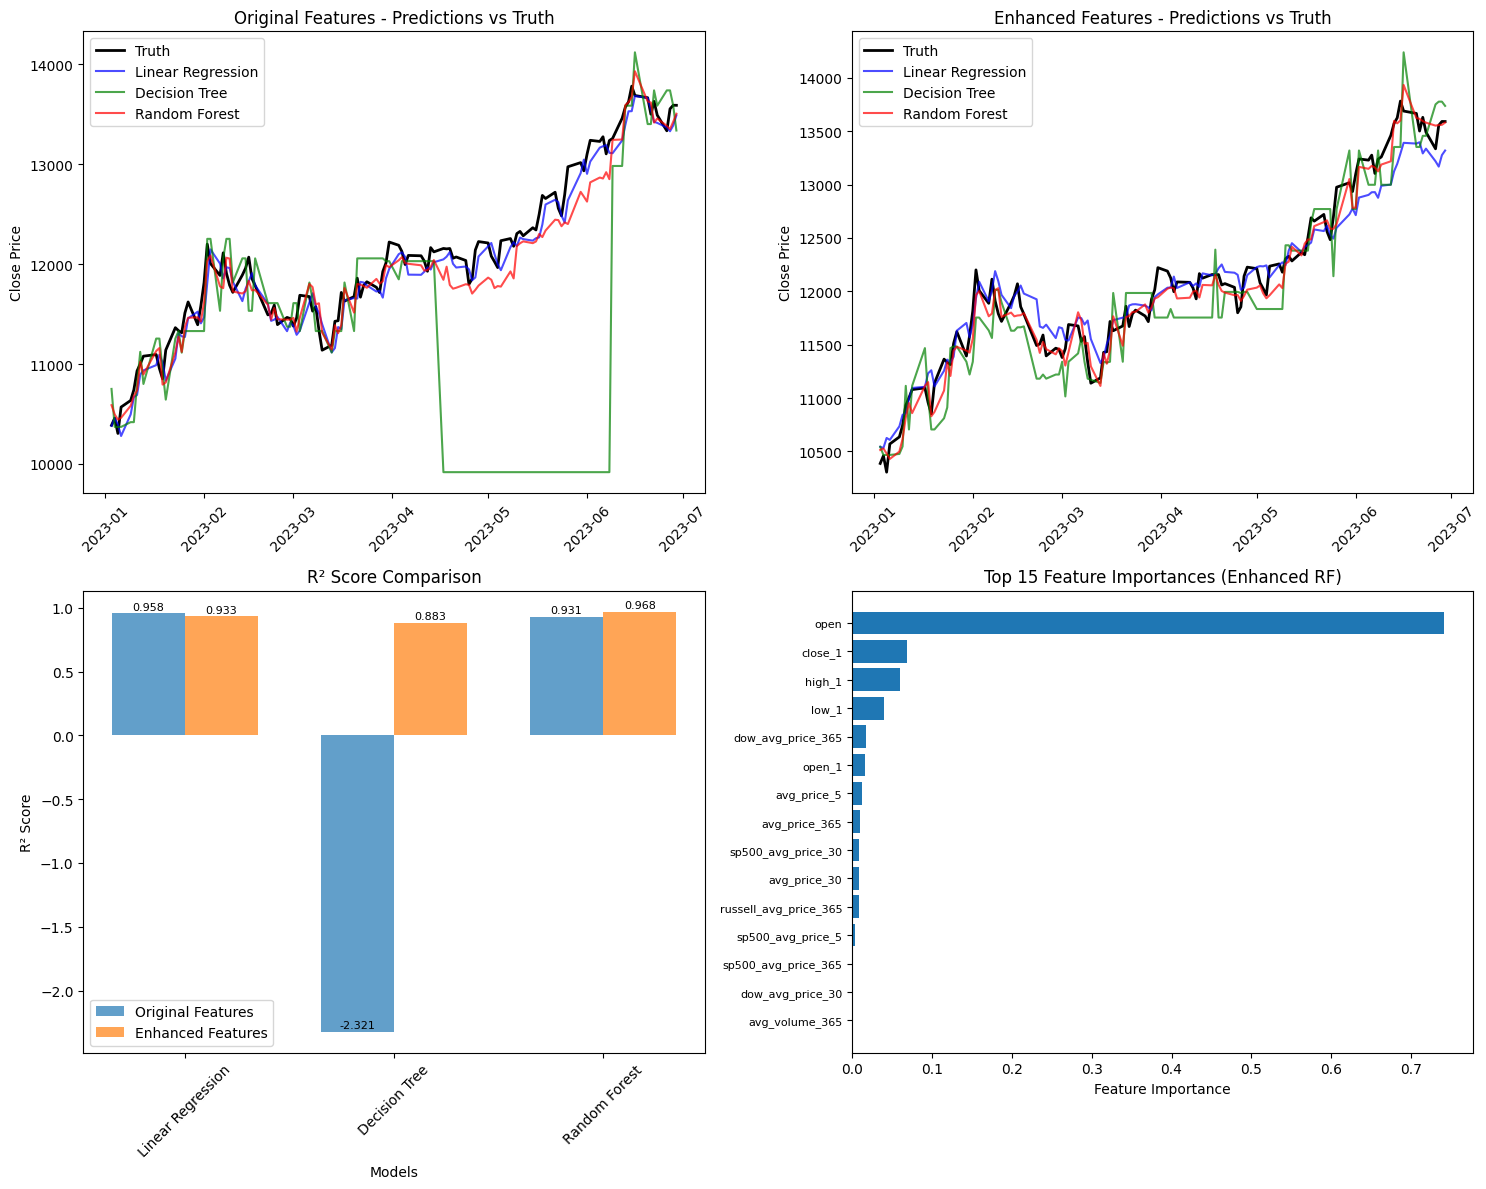

ENSEMBLE METHODS - COMBINING PREDICTIONS FROM ALL THREE MODELS
ENHANCED FEATURES ENSEMBLES:
----------------------------------------
AVERAGE     : R² = 0.9582 (Simple Average of all three models)
WEIGHTED    : R² = 0.9591 (Weighted Average (LR: 0.335, DT: 0.317, RF: 0.348))
BEST_TWO    : R² = 0.9650 (Average of best two models: Linear Regression and Random Forest)
MEDIAN      : R² = 0.9583 (Median of all three models)
ADAPTIVE    : R² = 0.9677 (Adaptive Weighted (Recent LR: 0.312, DT: 0.096, RF: 0.592))

ORIGINAL FEATURES ENSEMBLES:
----------------------------------------
AVERAGE     : R² = 0.4975 (Simple Average of all three models)
WEIGHTED    : R² = -0.1436 (Weighted Average (LR: 0.228, DT: 0.551, RF: 0.221))
BEST_TWO    : R² = 0.9535 (Average of best two models: Random Forest and Linear Regression)
MEDIAN      : R² = 0.9281 (Median of all three models)
ADAPTIVE    : R² = -2.2387 (Adaptive Weighted (Recent LR: 0.012, DT: 0.987, RF: 0.001))

BEST ENSEMBLE PERFORMANCE
Best Enhanced E

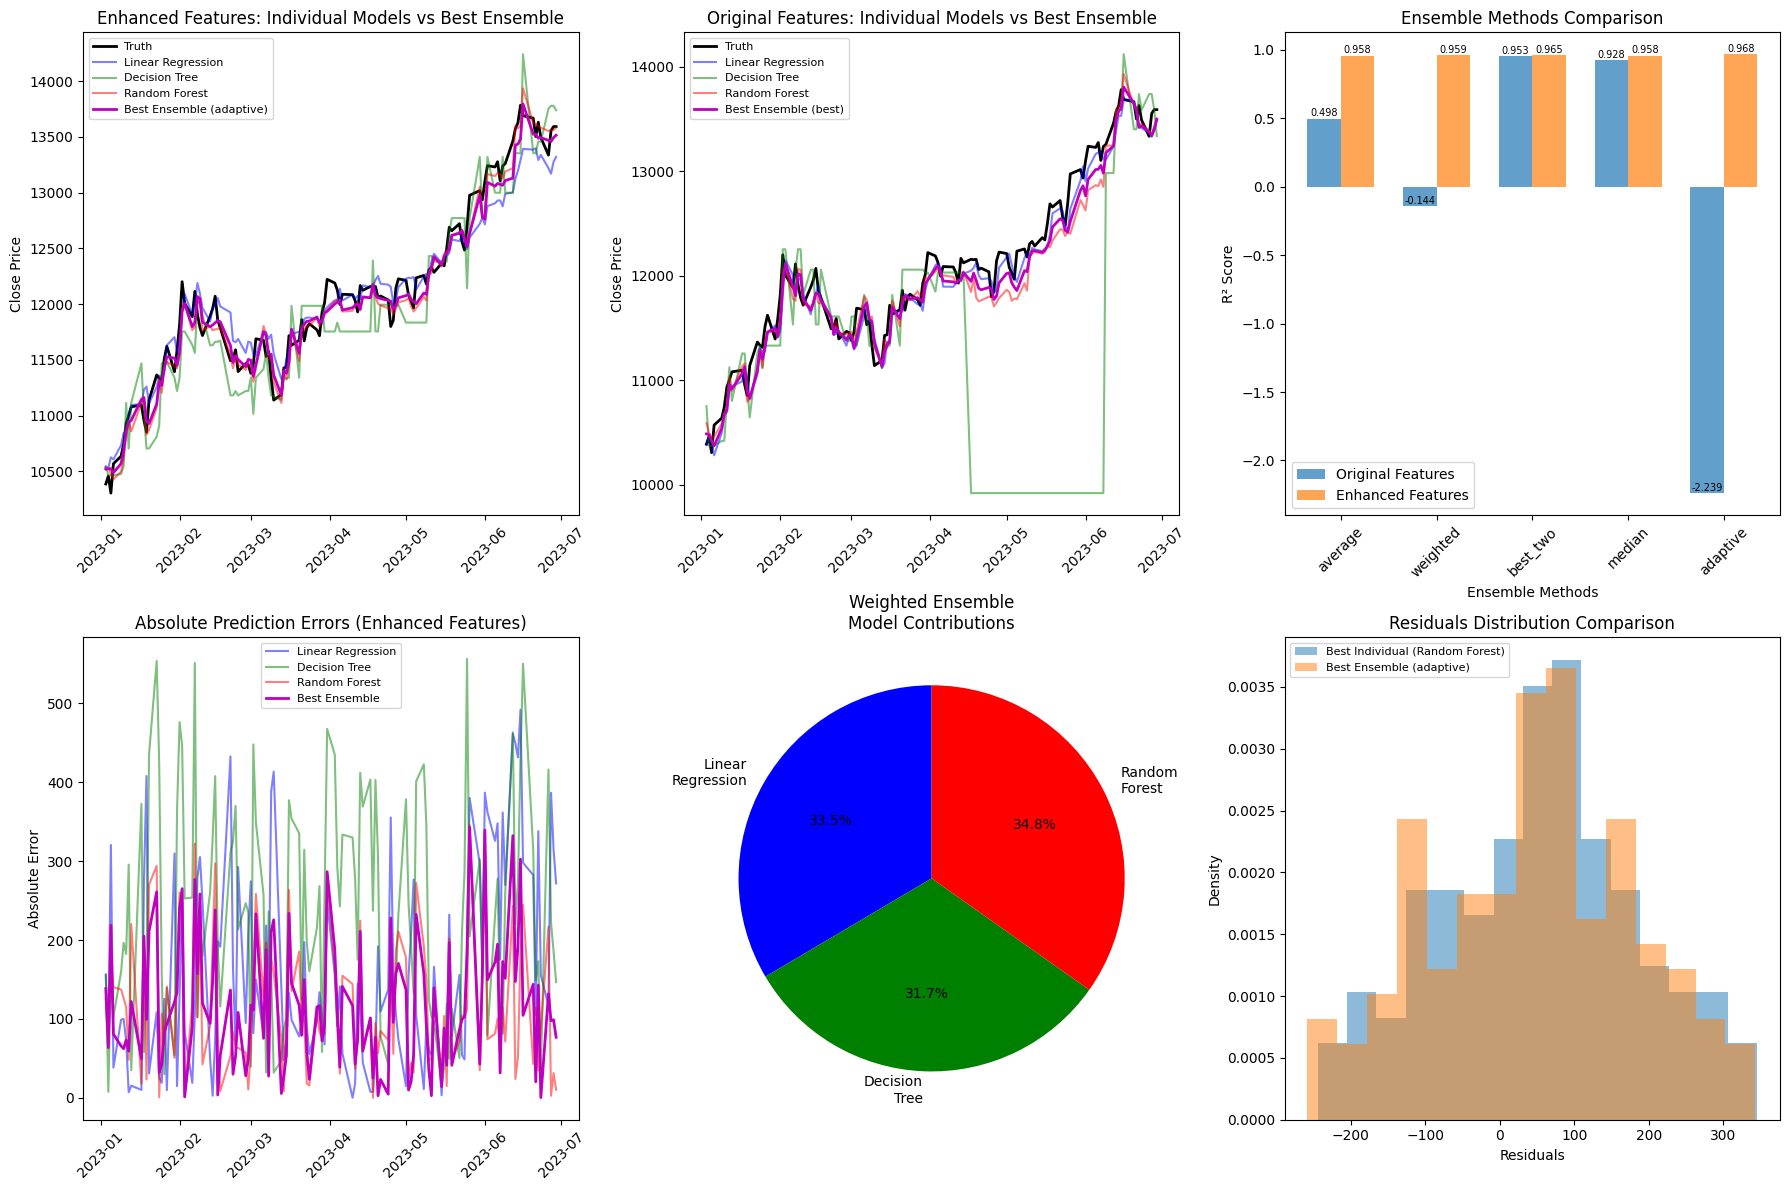


DETAILED ENSEMBLE ANALYSIS SUMMARY
Ensemble Method Enhanced R² Original R² Enhanced Improvement Original Improvement Best Method
        AVERAGE      0.9582      0.4975              -0.0100              -0.4604    Enhanced
       WEIGHTED      0.9591     -0.1436              -0.0092              -1.1015    Enhanced
       BEST_TWO      0.9650      0.9535              -0.0032              -0.0044    Enhanced
         MEDIAN      0.9583      0.9281              -0.0099              -0.0298    Enhanced
       ADAPTIVE      0.9677     -2.2387              -0.0005              -3.1966    Enhanced

KEY FINDINGS:
• Best overall ensemble method: Enhanced_adaptive
• Maximum ensemble improvement over best individual: -0.0005
• Most consistent ensemble method across feature sets: BEST_TWO

FEATURE IMPORTANCE ANALYSIS (Random Forest with Enhanced Features)
Top 20 Most Important Features:
              Feature  Importance
                 open    0.740829
              close_1    0.069276
        

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Download data for multiple indices
print("Downloading market data (1990-2023)...")

# Define the indices to download
indices = {
    '^IXIC': 'NASDAQ',     # NASDAQ Composite (our target)
    '^GSPC': 'SP500',      # S&P 500
    '^DJI': 'DOW',         # Dow Jones Industrial Average
    '^RUT': 'RUSSELL',     # Russell 2000 (small cap)
    '^VIX': 'VIX',         # Volatility Index
    '^TNX': 'TNX',         # 10-Year Treasury Note Yield
    'GLD': 'GOLD',         # Gold ETF as safe haven indicator
    'DXY': 'DOLLAR'        # US Dollar Index
}

# Download all data
all_data = {}
for symbol, name in indices.items():
    try:
        data = yf.download(
            symbol,
            start="1990-01-01",
            end="2023-06-30",
            progress=False
        )
        if not data.empty:
            all_data[name] = data
            print(f"Successfully downloaded {name} ({symbol})")
        else:
            print(f"No data available for {name} ({symbol})")
    except Exception as e:
        print(f"Error downloading {name} ({symbol}): {e}")

# Save NASDAQ data (our target) as before
nasdaq_data = all_data['NASDAQ']
nasdaq_data.to_csv('19900101_20230630.csv')

def add_original_feature(df, df_new, prefix=''):
    """Add original OHLCV features with optional prefix"""
    df_new[f'{prefix}open'] = df['Open']
    df_new[f'{prefix}open_1'] = df['Open'].shift(1)
    df_new[f'{prefix}close_1'] = df['Close'].shift(1)
    df_new[f'{prefix}high_1'] = df['High'].shift(1)
    df_new[f'{prefix}low_1'] = df['Low'].shift(1)
    if 'Volume' in df.columns:
        df_new[f'{prefix}volume_1'] = df['Volume'].shift(1)

def add_avg_price(df, df_new, prefix=''):
    """Add moving average price features with optional prefix"""
    df_new[f'{prefix}avg_price_5'] = df['Close'].rolling(window=5).mean().shift(1)
    df_new[f'{prefix}avg_price_30'] = df['Close'].rolling(window=21).mean().shift(1)
    df_new[f'{prefix}avg_price_365'] = df['Close'].rolling(window=252).mean().shift(1)
    df_new[f'{prefix}ratio_avg_price_5_30'] = df_new[f'{prefix}avg_price_5'] / df_new[f'{prefix}avg_price_30']
    df_new[f'{prefix}ratio_avg_price_5_365'] = df_new[f'{prefix}avg_price_5'] / df_new[f'{prefix}avg_price_365']
    df_new[f'{prefix}ratio_avg_price_30_365'] = df_new[f'{prefix}avg_price_30'] / df_new[f'{prefix}avg_price_365']

def add_avg_volume(df, df_new, prefix=''):
    """Add moving average volume features with optional prefix"""
    if 'Volume' in df.columns:
        df_new[f'{prefix}avg_volume_5'] = df['Volume'].rolling(window=5).mean().shift(1)
        df_new[f'{prefix}avg_volume_30'] = df['Volume'].rolling(window=21).mean().shift(1)
        df_new[f'{prefix}avg_volume_365'] = df['Volume'].rolling(window=252).mean().shift(1)
        df_new[f'{prefix}ratio_avg_volume_5_30'] = df_new[f'{prefix}avg_volume_5'] / df_new[f'{prefix}avg_volume_30']
        df_new[f'{prefix}ratio_avg_volume_5_365'] = df_new[f'{prefix}avg_volume_5'] / df_new[f'{prefix}avg_volume_365']
        df_new[f'{prefix}ratio_avg_volume_30_365'] = df_new[f'{prefix}avg_volume_30'] / df_new[f'{prefix}avg_volume_365']

def add_std_price(df, df_new, prefix=''):
    """Add price volatility features (fixed from original code)"""
    df_new[f'{prefix}std_price_5'] = df['Close'].rolling(window=5).std().shift(1)
    df_new[f'{prefix}std_price_30'] = df['Close'].rolling(window=21).std().shift(1)
    df_new[f'{prefix}std_price_365'] = df['Close'].rolling(window=252).std().shift(1)
    # Avoid division by zero
    df_new[f'{prefix}ratio_std_price_5_30'] = df_new[f'{prefix}std_price_5'] / (df_new[f'{prefix}std_price_30'] + 1e-8)
    df_new[f'{prefix}ratio_std_price_5_365'] = df_new[f'{prefix}std_price_5'] / (df_new[f'{prefix}std_price_365'] + 1e-8)
    df_new[f'{prefix}ratio_std_price_30_365'] = df_new[f'{prefix}std_price_30'] / (df_new[f'{prefix}std_price_365'] + 1e-8)

def add_std_volume(df, df_new, prefix=''):
    """Add volume volatility features (fixed from original code)"""
    if 'Volume' in df.columns:
        df_new[f'{prefix}std_volume_5'] = df['Volume'].rolling(window=5).std().shift(1)
        df_new[f'{prefix}std_volume_30'] = df['Volume'].rolling(window=21).std().shift(1)
        df_new[f'{prefix}std_volume_365'] = df['Volume'].rolling(window=252).std().shift(1)
        # Avoid division by zero
        df_new[f'{prefix}ratio_std_volume_5_30'] = df_new[f'{prefix}std_volume_5'] / (df_new[f'{prefix}std_volume_30'] + 1e-8)
        df_new[f'{prefix}ratio_std_volume_5_365'] = df_new[f'{prefix}std_volume_5'] / (df_new[f'{prefix}std_volume_365'] + 1e-8)
        df_new[f'{prefix}ratio_std_volume_30_365'] = df_new[f'{prefix}std_volume_30'] / (df_new[f'{prefix}std_volume_365'] + 1e-8)

def add_return_feature(df, df_new, prefix=''):
    """Add return-based features with optional prefix"""
    df_new[f'{prefix}return_1'] = ((df['Close']-df['Close'].shift(1))/df['Close'].shift(1)).shift(1)
    df_new[f'{prefix}return_5'] = ((df['Close']- df['Close'].shift(5))/df['Close'].shift(5)).shift(1)
    df_new[f'{prefix}return_30'] = ((df['Close']- df['Close'].shift(21))/df['Close'].shift(21)).shift(1)
    df_new[f'{prefix}return_365'] = ((df['Close']- df['Close'].shift(252))/df['Close'].shift(252)).shift(1)
    df_new[f'{prefix}moving_avg_5'] = df_new[f'{prefix}return_1'].rolling(window=5).mean().shift(1)
    df_new[f'{prefix}moving_avg_30'] = df_new[f'{prefix}return_1'].rolling(window=21).mean().shift(1)
    df_new[f'{prefix}moving_avg_365'] = df_new[f'{prefix}return_1'].rolling(window=252).mean().shift(1)

def add_correlation_features(nasdaq_df, other_dfs, df_new):
    """Add correlation-based features between NASDAQ and other indices"""
    nasdaq_returns = nasdaq_df['Close'].pct_change()

    for name, other_df in other_dfs.items():
        if other_df is not None and not other_df.empty and 'Close' in other_df.columns:
            try:
                other_returns = other_df['Close'].pct_change()

                # Rolling correlations - ensure we get Series, not DataFrame
                corr_5 = nasdaq_returns.rolling(window=5).corr(other_returns).shift(1)
                corr_30 = nasdaq_returns.rolling(window=21).corr(other_returns).shift(1)
                corr_90 = nasdaq_returns.rolling(window=63).corr(other_returns).shift(1)

                # Make sure we're assigning Series, not DataFrame
                if isinstance(corr_5, pd.Series):
                    df_new[f'corr_{name.lower()}_5'] = corr_5
                if isinstance(corr_30, pd.Series):
                    df_new[f'corr_{name.lower()}_30'] = corr_30
                if isinstance(corr_90, pd.Series):
                    df_new[f'corr_{name.lower()}_90'] = corr_90

                # Relative strength
                nasdaq_ma = nasdaq_df['Close'].rolling(window=21).mean()
                other_ma = other_df['Close'].rolling(window=21).mean()
                nasdaq_rs = nasdaq_df['Close'] / nasdaq_ma
                other_rs = other_df['Close'] / other_ma
                rel_strength = (nasdaq_rs / other_rs).shift(1)

                # Make sure we're assigning Series, not DataFrame
                if isinstance(rel_strength, pd.Series):
                    df_new[f'rel_strength_{name.lower()}'] = rel_strength

            except Exception as e:
                print(f"Warning: Could not generate correlation features for {name}: {e}")
                continue

def generate_enhanced_features(target_df, other_indices_data):
    """
    Generate enhanced features including signals from other market indices
    """
    print(f"Generating features for target with shape: {target_df.shape}")
    df_new = pd.DataFrame()

    # Original NASDAQ features (our target)
    print("Adding original NASDAQ features...")
    add_original_feature(target_df, df_new)
    add_avg_price(target_df, df_new)
    add_avg_volume(target_df, df_new)
    add_std_price(target_df, df_new)
    add_std_volume(target_df, df_new)
    add_return_feature(target_df, df_new)

    print(f"After original features: {df_new.shape}")

    # Add features from other indices
    for name, other_df in other_indices_data.items():
        if other_df is not None and not other_df.empty and name != 'NASDAQ':
            print(f"Adding features from {name}...")
            try:
                prefix = f"{name.lower()}_"
                # Add subset of features for other indices (focusing on returns and key metrics)
                add_return_feature(other_df, df_new, prefix)
                add_avg_price(other_df, df_new, prefix)
                add_std_price(other_df, df_new, prefix)

                # Add the current close price as a feature
                if 'Close' in other_df.columns:
                    close_shifted = other_df['Close'].shift(1)
                    if isinstance(close_shifted, pd.Series):
                        df_new[f'{prefix}close_current'] = close_shifted

                print(f"After {name} features: {df_new.shape}")
            except Exception as e:
                print(f"Warning: Could not add features from {name}: {e}")
                continue

    # Add correlation and relative strength features
    print("Adding correlation features...")
    try:
        other_indices = {k: v for k, v in other_indices_data.items() if k != 'NASDAQ'}
        add_correlation_features(target_df, other_indices, df_new)
        print(f"After correlation features: {df_new.shape}")
    except Exception as e:
        print(f"Warning: Could not add correlation features: {e}")

    # The target (NASDAQ close price)
    df_new['close'] = target_df['Close']
    print(f"Before dropna: {df_new.shape}")
    df_new = df_new.dropna()
    print(f"After dropna: {df_new.shape}")

    return df_new

# Load and prepare NASDAQ data
# First, let's examine the CSV structure
print("Examining CSV structure...")
with open('19900101_20230630.csv', 'r') as f:
    for i, line in enumerate(f):
        if i < 5:  # Show first 5 lines
            print(f"Line {i}: {line.strip()}")

# Load the data with proper handling
try:
    # Try loading with header=0 first (most common case)
    data_raw = pd.read_csv('19900101_20230630.csv', index_col=0)
    print(f"Loaded with header=0. Shape: {data_raw.shape}")
    print(f"Columns: {list(data_raw.columns)}")
    print(f"Index name: {data_raw.index.name}")

    # If the columns don't match expected OHLCV format, try different approach
    if len(data_raw.columns) != 5 or 'Close' not in data_raw.columns:
        print("Standard format not detected, trying alternative loading...")
        data_raw = pd.read_csv('19900101_20230630.csv', header=None, index_col=0, skiprows=1)
        data_raw.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
        # Keep only the columns we need and reorder to match expected format
        data_raw = data_raw[['Close', 'High', 'Low', 'Open', 'Volume']]

except Exception as e:
    print(f"Error loading with header=0: {e}")
    print("Trying with skiprows=2...")
    data_raw = pd.read_csv('19900101_20230630.csv', header=None, index_col=0, skiprows=2)
    data_raw.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

data_raw.index.name = 'Date'

# Convert index to datetime with error handling
try:
    data_raw.index = pd.to_datetime(data_raw.index)
    print(f"Successfully converted index to datetime. Date range: {data_raw.index.min()} to {data_raw.index.max()}")
except Exception as e:
    print(f"Error converting index to datetime: {e}")
    print(f"First few index values: {data_raw.index[:5].tolist()}")
    # Try to clean the index first
    data_raw.index = data_raw.index.str.strip()  # Remove whitespace
    data_raw = data_raw[data_raw.index != 'Date']  # Remove any 'Date' header rows
    data_raw.index = pd.to_datetime(data_raw.index, errors='coerce')
    data_raw = data_raw.dropna()  # Remove rows with invalid dates
    print(f"After cleaning - Shape: {data_raw.shape}, Date range: {data_raw.index.min()} to {data_raw.index.max()}")

print(f"Final data shape: {data_raw.shape}")
print(f"Data types:\n{data_raw.dtypes}")
print(f"First few rows:\n{data_raw.head()}")

# Convert all columns to numeric, handling any non-numeric values
print("Converting data to numeric types...")
for col in data_raw.columns:
    data_raw[col] = pd.to_numeric(data_raw[col], errors='coerce')

# Remove any rows with NaN values that resulted from conversion
rows_before = len(data_raw)
data_raw = data_raw.dropna()
rows_after = len(data_raw)
if rows_before != rows_after:
    print(f"Removed {rows_before - rows_after} rows with non-numeric data")

print(f"After numeric conversion - Shape: {data_raw.shape}")
print(f"Data types:\n{data_raw.dtypes}")
print(f"Sample data:\n{data_raw.head()}")

# Ensure we have the minimum required data
if len(data_raw) < 500:
    print("ERROR: Not enough data rows. Please check the CSV file format.")
    print("Expected format: Date,Open,High,Low,Close,Adj Close,Volume")
else:
    print(f"Data validation passed. Ready to generate features with {len(data_raw)} rows.")

# Align all other indices data with NASDAQ dates
aligned_data = {'NASDAQ': data_raw}
print(f"\nAligning other market indices with NASDAQ data...")
print(f"NASDAQ date range: {data_raw.index.min()} to {data_raw.index.max()}")

for name, df in all_data.items():
    if name != 'NASDAQ' and df is not None and not df.empty:
        try:
            # Ensure both indices are datetime
            if not isinstance(df.index, pd.DatetimeIndex):
                df.index = pd.to_datetime(df.index)

            # Convert all columns to numeric
            for col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')
            df = df.dropna()

            # Reindex to match NASDAQ dates using forward fill
            df_aligned = df.reindex(data_raw.index, method='ffill')
            aligned_data[name] = df_aligned
            print(f"✓ Aligned {name} data: {df_aligned.shape} - Date range: {df.index.min()} to {df.index.max()}")
        except Exception as e:
            print(f"✗ Failed to align {name}: {e}")
    elif name != 'NASDAQ':
        print(f"✗ Skipping {name}: No data available")

# Generate original features (for comparison)
def generate_features_original(df):
    """Original feature generation function for comparison"""
    df_new = pd.DataFrame()
    add_original_feature(df, df_new)
    add_avg_price(df, df_new)
    add_avg_volume(df, df_new)
    add_std_price(df, df_new)
    add_std_volume(df, df_new)
    add_return_feature(df, df_new)
    df_new['close'] = df['Close']
    df_new = df_new.dropna()
    return df_new

print("Generating original features...")
data_original = generate_features_original(data_raw)

# Generate enhanced features with other indices
print("Generating enhanced features with other market indices...")
data_enhanced = generate_enhanced_features(data_raw, aligned_data)



print(f"Original features shape: {data_original.shape}")
print(f"Enhanced features shape: {data_enhanced.shape}")
print(f"Added {data_enhanced.shape[1] - data_original.shape[1]} new features from other indices")

# Split data
start_train = '1990-01-01'
end_train = '2022-12-31'
start_test = '2023-01-01'
end_test = '2023-06-30'

def prepare_data(data, start_train, end_train, start_test, end_test):
    """Prepare training and testing data"""
    data_train = data.loc[start_train:end_train]
    data_test = data.loc[start_test:end_test]

    X_train = data_train.drop('close', axis=1).values
    y_train = data_train['close'].values
    X_test = data_test.drop('close', axis=1).values
    y_test = data_test['close'].values

    return X_train, y_train, X_test, y_test, data_test

# Prepare both datasets
X_train_orig, y_train_orig, X_test_orig, y_test_orig, data_test_orig = prepare_data(
    data_original, start_train, end_train, start_test, end_test)

X_train_enh, y_train_enh, X_test_enh, y_test_enh, data_test_enh = prepare_data(
    data_enhanced, start_train, end_train, start_test, end_test)

print(f"Original training data shape: {X_train_orig.shape}")
print(f"Enhanced training data shape: {X_train_enh.shape}")

# Function to train and evaluate models
def train_evaluate_models(X_train, y_train, X_test, y_test, data_test, model_suffix=""):
    """Train and evaluate all three models"""
    results = {}

    # Scale features
    scaler = StandardScaler()
    X_scaled_train = scaler.fit_transform(X_train)
    X_scaled_test = scaler.transform(X_test)

    # Time series cross-validation
    tscv = TimeSeriesSplit(n_splits=3)

    # 1. SGD Linear Regression
    print(f"Training Linear Regression{model_suffix}...")
    param_grid_lr = {
        "alpha": [1e-4, 3e-4, 1e-3],
        "eta0": [0.01, 0.03, 0.1],
    }
    lr = SGDRegressor(penalty='l2', max_iter=5000, random_state=42)
    grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=tscv, scoring='r2')
    grid_search_lr.fit(X_scaled_train, y_train)

    lr_best = grid_search_lr.best_estimator_
    predictions_lr = lr_best.predict(X_scaled_test)
    r2_lr = r2_score(y_test, predictions_lr)

    results['Linear Regression'] = {
        'model': lr_best,
        'predictions': predictions_lr,
        'r2': r2_lr,
        'best_params': grid_search_lr.best_params_
    }

    # 2. Decision Tree
    print(f"Training Decision Tree{model_suffix}...")
    param_grid_dt = {
        'max_depth': [20, 30, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 3, 5]
    }
    dt = DecisionTreeRegressor(random_state=42)
    grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=tscv, scoring='r2', n_jobs=-1)
    grid_search_dt.fit(X_train, y_train)

    dt_best = grid_search_dt.best_estimator_
    predictions_dt = dt_best.predict(X_test)
    r2_dt = r2_score(y_test, predictions_dt)

    results['Decision Tree'] = {
        'model': dt_best,
        'predictions': predictions_dt,
        'r2': r2_dt,
        'best_params': grid_search_dt.best_params_
    }

    # 3. Random Forest
    print(f"Training Random Forest{model_suffix}...")
    param_grid_rf = {
        'max_depth': [20, 30, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 3, 5]
    }
    rf = RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=42)
    grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=tscv, scoring='r2', n_jobs=-1)
    grid_search_rf.fit(X_train, y_train)

    rf_best = grid_search_rf.best_estimator_
    predictions_rf = rf_best.predict(X_test)
    r2_rf = r2_score(y_test, predictions_rf)

    results['Random Forest'] = {
        'model': rf_best,
        'predictions': predictions_rf,
        'r2': r2_rf,
        'best_params': grid_search_rf.best_params_
    }

    return results

# Train models on both datasets
print("="*50)
print("TRAINING MODELS WITH ORIGINAL FEATURES")
print("="*50)
results_original = train_evaluate_models(
    X_train_orig, y_train_orig, X_test_orig, y_test_orig, data_test_orig, " (Original)")

print("="*50)
print("TRAINING MODELS WITH ENHANCED FEATURES")
print("="*50)
results_enhanced = train_evaluate_models(
    X_train_enh, y_train_enh, X_test_enh, y_test_enh, data_test_enh, " (Enhanced)")

# Compare results
print("="*50)
print("PERFORMANCE COMPARISON")
print("="*50)

comparison_data = []
for model_name in ['Linear Regression', 'Decision Tree', 'Random Forest']:
    r2_orig = results_original[model_name]['r2']
    r2_enh = results_enhanced[model_name]['r2']
    improvement = r2_enh - r2_orig

    comparison_data.append({
        'Model': model_name,
        'Original R²': f"{r2_orig:.4f}",
        'Enhanced R²': f"{r2_enh:.4f}",
        'Improvement': f"{improvement:+.4f}",
        'Relative Improvement': f"{(improvement/abs(r2_orig)*100):+.2f}%" if r2_orig != 0 else "N/A"
    })

    print(f"{model_name}:")
    print(f"  Original R²:  {r2_orig:.4f}")
    print(f"  Enhanced R²:  {r2_enh:.4f}")
    print(f"  Improvement:  {improvement:+.4f} ({(improvement/abs(r2_orig)*100):+.2f}%)")
    print()

# Create comparison DataFrame
comparison_df = pd.DataFrame(comparison_data)
print("Summary Table:")
print(comparison_df.to_string(index=False))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Original features predictions
ax1 = axes[0, 0]
ax1.plot(data_test_orig.index, y_test_orig, 'k-', linewidth=2, label='Truth')
ax1.plot(data_test_orig.index, results_original['Linear Regression']['predictions'], 'b-', alpha=0.7, label='Linear Regression')
ax1.plot(data_test_orig.index, results_original['Decision Tree']['predictions'], 'g-', alpha=0.7, label='Decision Tree')
ax1.plot(data_test_orig.index, results_original['Random Forest']['predictions'], 'r-', alpha=0.7, label='Random Forest')
ax1.set_title('Original Features - Predictions vs Truth')
ax1.set_ylabel('Close Price')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Enhanced features predictions
ax2 = axes[0, 1]
ax2.plot(data_test_enh.index, y_test_enh, 'k-', linewidth=2, label='Truth')
ax2.plot(data_test_enh.index, results_enhanced['Linear Regression']['predictions'], 'b-', alpha=0.7, label='Linear Regression')
ax2.plot(data_test_enh.index, results_enhanced['Decision Tree']['predictions'], 'g-', alpha=0.7, label='Decision Tree')
ax2.plot(data_test_enh.index, results_enhanced['Random Forest']['predictions'], 'r-', alpha=0.7, label='Random Forest')
ax2.set_title('Enhanced Features - Predictions vs Truth')
ax2.set_ylabel('Close Price')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

# Plot 3: R² Comparison
ax3 = axes[1, 0]
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_original = [results_original[m]['r2'] for m in models]
r2_enhanced = [results_enhanced[m]['r2'] for m in models]

x = np.arange(len(models))
width = 0.35

bars1 = ax3.bar(x - width/2, r2_original, width, label='Original Features', alpha=0.7)
bars2 = ax3.bar(x + width/2, r2_enhanced, width, label='Enhanced Features', alpha=0.7)

ax3.set_xlabel('Models')
ax3.set_ylabel('R² Score')
ax3.set_title('R² Score Comparison')
ax3.set_xticks(x)
ax3.set_xticklabels(models, rotation=45)
ax3.legend()

# Add value labels on bars
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax3.text(bar1.get_x() + bar1.get_width()/2., height1 + 0.01,
             f'{height1:.3f}', ha='center', va='bottom', fontsize=8)
    ax3.text(bar2.get_x() + bar2.get_width()/2., height2 + 0.01,
             f'{height2:.3f}', ha='center', va='bottom', fontsize=8)

# Plot 4: Feature importance for Random Forest (Enhanced)
ax4 = axes[1, 1]
if hasattr(results_enhanced['Random Forest']['model'], 'feature_importances_'):
    feature_names = data_enhanced.drop('close', axis=1).columns
    importances = results_enhanced['Random Forest']['model'].feature_importances_

    # Get top 15 most important features
    indices = np.argsort(importances)[::-1][:15]
    top_features = [feature_names[i] for i in indices]
    top_importances = [importances[i] for i in indices]

    y_pos = np.arange(len(top_features))
    ax4.barh(y_pos, top_importances)
    ax4.set_yticks(y_pos)
    ax4.set_yticklabels(top_features, fontsize=8)
    ax4.set_xlabel('Feature Importance')
    ax4.set_title('Top 15 Feature Importances (Enhanced RF)')
    ax4.invert_yaxis()

plt.tight_layout()
plt.show()

# ENSEMBLE METHODS
print("="*60)
print("ENSEMBLE METHODS - COMBINING PREDICTIONS FROM ALL THREE MODELS")
print("="*60)

def create_ensemble_predictions(results_dict, method='average'):
    """
    Create ensemble predictions from multiple models

    Args:
        results_dict: Dictionary containing model results
        method: 'average', 'weighted', 'stacking', or 'voting'

    Returns:
        ensemble_predictions: Combined predictions
        ensemble_info: Information about the ensemble method
    """

    predictions_lr = results_dict['Linear Regression']['predictions']
    predictions_dt = results_dict['Decision Tree']['predictions']
    predictions_rf = results_dict['Random Forest']['predictions']

    r2_lr = results_dict['Linear Regression']['r2']
    r2_dt = results_dict['Decision Tree']['r2']
    r2_rf = results_dict['Random Forest']['r2']

    if method == 'average':
        # Simple averaging
        ensemble_pred = (predictions_lr + predictions_dt + predictions_rf) / 3
        info = "Simple Average of all three models"

    elif method == 'weighted':
        # Weighted average based on R² scores
        # Use absolute values and add small epsilon to avoid division by zero
        weights = np.array([abs(r2_lr), abs(r2_dt), abs(r2_rf)]) + 1e-6
        weights = weights / weights.sum()  # Normalize to sum to 1

        ensemble_pred = (weights[0] * predictions_lr +
                        weights[1] * predictions_dt +
                        weights[2] * predictions_rf)
        info = f"Weighted Average (LR: {weights[0]:.3f}, DT: {weights[1]:.3f}, RF: {weights[2]:.3f})"

    elif method == 'best_two':
        # Average of the two best performing models
        r2_scores = [r2_lr, r2_dt, r2_rf]
        predictions = [predictions_lr, predictions_dt, predictions_rf]
        model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']

        # Get indices of two best models
        best_indices = np.argsort(r2_scores)[-2:]
        best_predictions = [predictions[i] for i in best_indices]
        best_names = [model_names[i] for i in best_indices]

        ensemble_pred = (best_predictions[0] + best_predictions[1]) / 2
        info = f"Average of best two models: {best_names[0]} and {best_names[1]}"

    elif method == 'median':
        # Median ensemble - more robust to outliers
        all_predictions = np.column_stack([predictions_lr, predictions_dt, predictions_rf])
        ensemble_pred = np.median(all_predictions, axis=1)
        info = "Median of all three models"

    elif method == 'adaptive':
        # Adaptive weighting based on recent performance
        # Use the last 20% of predictions to compute recent performance
        n_recent = max(5, len(predictions_lr) // 5)

        if len(predictions_lr) > n_recent:
            y_recent = y_test_enh[-n_recent:] if 'y_test_enh' in globals() else y_test_orig[-n_recent:]

            recent_r2_lr = r2_score(y_recent, predictions_lr[-n_recent:])
            recent_r2_dt = r2_score(y_recent, predictions_dt[-n_recent:])
            recent_r2_rf = r2_score(y_recent, predictions_rf[-n_recent:])

            # Use recent performance for weighting
            recent_weights = np.array([abs(recent_r2_lr), abs(recent_r2_dt), abs(recent_r2_rf)]) + 1e-6
            recent_weights = recent_weights / recent_weights.sum()

            ensemble_pred = (recent_weights[0] * predictions_lr +
                           recent_weights[1] * predictions_dt +
                           recent_weights[2] * predictions_rf)
            info = f"Adaptive Weighted (Recent LR: {recent_weights[0]:.3f}, DT: {recent_weights[1]:.3f}, RF: {recent_weights[2]:.3f})"
        else:
            # Fallback to regular weighted average
            ensemble_pred, info = create_ensemble_predictions(results_dict, 'weighted')

    return ensemble_pred, info

# Test different ensemble methods on both original and enhanced features
ensemble_methods = ['average', 'weighted', 'best_two', 'median', 'adaptive']
ensemble_results = {}

# Enhanced features ensembles
print("ENHANCED FEATURES ENSEMBLES:")
print("-" * 40)
for method in ensemble_methods:
    ensemble_pred, info = create_ensemble_predictions(results_enhanced, method)
    ensemble_r2 = r2_score(y_test_enh, ensemble_pred)
    ensemble_results[f'Enhanced_{method}'] = {
        'predictions': ensemble_pred,
        'r2': ensemble_r2,
        'info': info,
        'y_test': y_test_enh,
        'data_test': data_test_enh
    }
    print(f"{method.upper():12s}: R² = {ensemble_r2:.4f} ({info})")

print()

# Original features ensembles
print("ORIGINAL FEATURES ENSEMBLES:")
print("-" * 40)
for method in ensemble_methods:
    ensemble_pred, info = create_ensemble_predictions(results_original, method)
    ensemble_r2 = r2_score(y_test_orig, ensemble_pred)
    ensemble_results[f'Original_{method}'] = {
        'predictions': ensemble_pred,
        'r2': ensemble_r2,
        'info': info,
        'y_test': y_test_orig,
        'data_test': data_test_orig
    }
    print(f"{method.upper():12s}: R² = {ensemble_r2:.4f} ({info})")

# Find best ensemble methods
print("\n" + "="*50)
print("BEST ENSEMBLE PERFORMANCE")
print("="*50)

best_enhanced = max(ensemble_results.items(),
                   key=lambda x: x[1]['r2'] if 'Enhanced' in x[0] else -float('inf'))
best_original = max(ensemble_results.items(),
                   key=lambda x: x[1]['r2'] if 'Original' in x[0] else -float('inf'))

print(f"Best Enhanced Ensemble: {best_enhanced[0]} with R² = {best_enhanced[1]['r2']:.4f}")
print(f"Best Original Ensemble:  {best_original[0]} with R² = {best_original[1]['r2']:.4f}")

# Compare with individual models
best_individual_enhanced = max(results_enhanced.items(), key=lambda x: x[1]['r2'])
best_individual_original = max(results_original.items(), key=lambda x: x[1]['r2'])

print(f"\nComparison with best individual models:")
print(f"Enhanced - Best Individual: {best_individual_enhanced[0]} (R² = {best_individual_enhanced[1]['r2']:.4f})")
print(f"Enhanced - Best Ensemble:   {best_enhanced[0].split('_')[1]} (R² = {best_enhanced[1]['r2']:.4f})")
print(f"Enhancement from ensemble:  {best_enhanced[1]['r2'] - best_individual_enhanced[1]['r2']:+.4f}")

print(f"\nOriginal - Best Individual: {best_individual_original[0]} (R² = {best_individual_original[1]['r2']:.4f})")
print(f"Original - Best Ensemble:   {best_original[0].split('_')[1]} (R² = {best_original[1]['r2']:.4f})")
print(f"Enhancement from ensemble:  {best_original[1]['r2'] - best_individual_original[1]['r2']:+.4f}")

# Detailed ensemble comparison visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Enhanced features - Individual vs Best Ensemble
ax1 = axes[0, 0]
ax1.plot(data_test_enh.index, y_test_enh, 'k-', linewidth=2, label='Truth')
ax1.plot(data_test_enh.index, results_enhanced['Linear Regression']['predictions'], 'b-', alpha=0.5, label='Linear Regression')
ax1.plot(data_test_enh.index, results_enhanced['Decision Tree']['predictions'], 'g-', alpha=0.5, label='Decision Tree')
ax1.plot(data_test_enh.index, results_enhanced['Random Forest']['predictions'], 'r-', alpha=0.5, label='Random Forest')
ax1.plot(data_test_enh.index, best_enhanced[1]['predictions'], 'm-', linewidth=2, label=f'Best Ensemble ({best_enhanced[0].split("_")[1]})')
ax1.set_title('Enhanced Features: Individual Models vs Best Ensemble')
ax1.set_ylabel('Close Price')
ax1.legend(fontsize=8)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Original features - Individual vs Best Ensemble
ax2 = axes[0, 1]
ax2.plot(data_test_orig.index, y_test_orig, 'k-', linewidth=2, label='Truth')
ax2.plot(data_test_orig.index, results_original['Linear Regression']['predictions'], 'b-', alpha=0.5, label='Linear Regression')
ax2.plot(data_test_orig.index, results_original['Decision Tree']['predictions'], 'g-', alpha=0.5, label='Decision Tree')
ax2.plot(data_test_orig.index, results_original['Random Forest']['predictions'], 'r-', alpha=0.5, label='Random Forest')
ax2.plot(data_test_orig.index, best_original[1]['predictions'], 'm-', linewidth=2, label=f'Best Ensemble ({best_original[0].split("_")[1]})')
ax2.set_title('Original Features: Individual Models vs Best Ensemble')
ax2.set_ylabel('Close Price')
ax2.legend(fontsize=8)
ax2.tick_params(axis='x', rotation=45)

# Plot 3: R² comparison - All ensemble methods
ax3 = axes[0, 2]
enhanced_r2s = [ensemble_results[f'Enhanced_{method}']['r2'] for method in ensemble_methods]
original_r2s = [ensemble_results[f'Original_{method}']['r2'] for method in ensemble_methods]

x = np.arange(len(ensemble_methods))
width = 0.35

bars1 = ax3.bar(x - width/2, original_r2s, width, label='Original Features', alpha=0.7)
bars2 = ax3.bar(x + width/2, enhanced_r2s, width, label='Enhanced Features', alpha=0.7)

ax3.set_xlabel('Ensemble Methods')
ax3.set_ylabel('R² Score')
ax3.set_title('Ensemble Methods Comparison')
ax3.set_xticks(x)
ax3.set_xticklabels(ensemble_methods, rotation=45)
ax3.legend()

# Add value labels on bars
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax3.text(bar1.get_x() + bar1.get_width()/2., height1 + 0.001,
             f'{height1:.3f}', ha='center', va='bottom', fontsize=7)
    ax3.text(bar2.get_x() + bar2.get_width()/2., height2 + 0.001,
             f'{height2:.3f}', ha='center', va='bottom', fontsize=7)

# Plot 4: Prediction errors over time (Enhanced features)
ax4 = axes[1, 0]
errors_lr = np.abs(y_test_enh - results_enhanced['Linear Regression']['predictions'])
errors_dt = np.abs(y_test_enh - results_enhanced['Decision Tree']['predictions'])
errors_rf = np.abs(y_test_enh - results_enhanced['Random Forest']['predictions'])
errors_ensemble = np.abs(y_test_enh - best_enhanced[1]['predictions'])

ax4.plot(data_test_enh.index, errors_lr, 'b-', alpha=0.5, label='Linear Regression')
ax4.plot(data_test_enh.index, errors_dt, 'g-', alpha=0.5, label='Decision Tree')
ax4.plot(data_test_enh.index, errors_rf, 'r-', alpha=0.5, label='Random Forest')
ax4.plot(data_test_enh.index, errors_ensemble, 'm-', linewidth=2, label='Best Ensemble')
ax4.set_title('Absolute Prediction Errors (Enhanced Features)')
ax4.set_ylabel('Absolute Error')
ax4.legend(fontsize=8)
ax4.tick_params(axis='x', rotation=45)

# Plot 5: Ensemble weight visualization (for weighted method)
ax5 = axes[1, 1]
if 'Enhanced_weighted' in ensemble_results:
    # Extract weights from weighted ensemble info
    info_str = ensemble_results['Enhanced_weighted']['info']
    import re
    weights = re.findall(r'(\d+\.\d+)', info_str)
    if len(weights) == 3:
        weights = [float(w) for w in weights]
        models = ['Linear\nRegression', 'Decision\nTree', 'Random\nForest']
        colors = ['blue', 'green', 'red']

        wedges, texts, autotexts = ax5.pie(weights, labels=models, autopct='%1.1f%%',
                                          colors=colors, startangle=90)
        ax5.set_title('Weighted Ensemble\nModel Contributions')

# Plot 6: Residuals distribution comparison
ax6 = axes[1, 2]
residuals_best_individual = y_test_enh - best_individual_enhanced[1]['predictions']
residuals_best_ensemble = y_test_enh - best_enhanced[1]['predictions']

ax6.hist(residuals_best_individual, bins=15, alpha=0.5, label=f'Best Individual ({best_individual_enhanced[0]})', density=True)
ax6.hist(residuals_best_ensemble, bins=15, alpha=0.5, label=f'Best Ensemble ({best_enhanced[0].split("_")[1]})', density=True)
ax6.set_xlabel('Residuals')
ax6.set_ylabel('Density')
ax6.set_title('Residuals Distribution Comparison')
ax6.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Summary statistics table
print("\n" + "="*60)
print("DETAILED ENSEMBLE ANALYSIS SUMMARY")
print("="*60)

summary_data = []
for method in ensemble_methods:
    enh_key = f'Enhanced_{method}'
    orig_key = f'Original_{method}'

    enh_r2 = ensemble_results[enh_key]['r2']
    orig_r2 = ensemble_results[orig_key]['r2']

    # Compare with best individual model
    enh_improvement = enh_r2 - best_individual_enhanced[1]['r2']
    orig_improvement = orig_r2 - best_individual_original[1]['r2']

    summary_data.append({
        'Ensemble Method': method.upper(),
        'Enhanced R²': f"{enh_r2:.4f}",
        'Original R²': f"{orig_r2:.4f}",
        'Enhanced Improvement': f"{enh_improvement:+.4f}",
        'Original Improvement': f"{orig_improvement:+.4f}",
        'Best Method': 'Enhanced' if enh_r2 > orig_r2 else 'Original'
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\nKEY FINDINGS:")
print(f"• Best overall ensemble method: {best_enhanced[0] if best_enhanced[1]['r2'] > best_original[1]['r2'] else best_original[0]}")
print(f"• Maximum ensemble improvement over best individual: {max(best_enhanced[1]['r2'] - best_individual_enhanced[1]['r2'], best_original[1]['r2'] - best_individual_original[1]['r2']):+.4f}")
print(f"• Most consistent ensemble method across feature sets: {min(summary_data, key=lambda x: abs(float(x['Enhanced R²']) - float(x['Original R²'])))['Ensemble Method']}")

# Print feature importance analysis
print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS (Random Forest with Enhanced Features)")
print("="*50)

if hasattr(results_enhanced['Random Forest']['model'], 'feature_importances_'):
    feature_names = data_enhanced.drop('close', axis=1).columns
    importances = results_enhanced['Random Forest']['model'].feature_importances_

    # Create feature importance DataFrame
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print("Top 20 Most Important Features:")
    print(feature_importance_df.head(20).to_string(index=False))

    # Analyze new vs original features
    new_features = feature_importance_df[
        feature_importance_df['Feature'].str.contains('sp500_|dow_|russell_|vix_|tnx_|gold_|dollar_|corr_|rel_strength_')
    ]

    if not new_features.empty:
        print(f"\nNew features from other indices in top 20: {len(new_features[new_features.index < 20])}")
        print("Top new features:")
        print(new_features.head(10).to_string(index=False))

        total_new_importance = new_features['Importance'].sum()
        print(f"\nTotal importance of new features: {total_new_importance:.4f} ({total_new_importance*100:.2f}%)")